In [1]:
#!pip install Flask --upgrade
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import re
import numpy as np

from fitter import Fitter, get_common_distributions, get_distributions
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.datasets import make_friedman3, make_s_curve
from sklearn.linear_model import BayesianRidge, ElasticNet
from sklearn.model_selection import KFold, train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.neural_network import MLPClassifier

!pip install imbalanced-learn
!pip install lightgbm
!pip install wittgenstein --user
!pip install explainerdashboard --user

from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# for Box-Cox Transformation
from scipy import stats

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px

from tqdm import tqdm
import math

from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

#Multilabel Stratified K Fold Creation
!pip install iterative-stratification
import sys
sys.path.append('../input/iterative-stratification/iterative-stratification-master')
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [2]:
#Collect data from sensors (i.e., time-series data) installed in the manufacturing system 
ai4i2020_encoded_balanced=pd.read_csv(r'G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\raw_data\\ai4i2020_encoded_balanced.csv')
ai4i2020_encoded_balanced.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     1                298.1                    308.6                    1551   
1     0                298.2                    308.7                    1408   
2     0                298.1                    308.5                    1498   
3     0                298.2                    308.6                    1433   
4     0                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  
0         42.8                0                0    0    0    0    0    0  
1         46.3                3                0    0    0    0    0    0  
2         49.4                5                0    0    0    0    0    0  
3         39.5                7                0    0    0    0    0    0  
4         40.0                9                0    0    0    0    0    0

In [3]:
# Run in local
# Fold index
fold = 1

original_X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
original_X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
y_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
y_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")

In [4]:
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [5]:
acc_list = []
auc_list = []
kappa_list = []

## Fuzzy Cognitive Map

In [6]:
from numpy import genfromtxt
y_train_pred_fcm = genfromtxt(r'G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_pred_fcm.csv", delimiter=',')
y_test_pred_fcm = genfromtxt(r'G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_pred_fcm.csv", delimiter=',')
fcm_pred_class_train = genfromtxt(r'G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\fcm_pred_class_train.csv", delimiter=',')
fcm_pred_class_test = genfromtxt(r'G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\fcm_pred_class_test.csv", delimiter=',')

<AxesSubplot:>

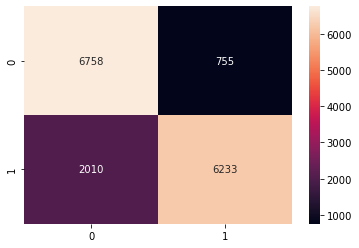

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, fcm_pred_class_train)
sns.heatmap(confusion_matrix(y_train, fcm_pred_class_train), annot=True,fmt='d')

In [8]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train,fcm_pred_class_train))
print("Recall Score: ",recall_score(y_train, fcm_pred_class_train))
print("F1 Score: ",f1_score(y_train, fcm_pred_class_train))
print("Accuracy Score: ",accuracy_score(y_train, fcm_pred_class_train))

Precision Score:  0.8919576416714368
Recall Score:  0.7561567390513163
F1 Score:  0.8184623465301032
Accuracy Score:  0.8245112972835745


#### Evaluating on Test set 

In [9]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

print("Precision Score: ",precision_score(y_test, fcm_pred_class_test))
print("Recall Score: ",recall_score(y_test, fcm_pred_class_test))
print("F1 Score: ",f1_score(y_test, fcm_pred_class_test))
print("Accuracy Score: ",accuracy_score(y_test, fcm_pred_class_test))

Precision Score:  0.8835534213685474
Recall Score:  0.8034934497816594
F1 Score:  0.8416237850200115
Accuracy Score:  0.8418046830382638


In [10]:
#calculate AUC of model
from sklearn import metrics
auc_fcm = metrics.roc_auc_score(y_test, y_test_pred_fcm)
print(auc_fcm)

0.8755667703893523


In [11]:
cohen_score_fcm = cohen_kappa_score(y_test, fcm_pred_class_test)
cohen_score_fcm

0.6843182597727349

In [12]:
acc_list.append(metrics.accuracy_score(y_test, fcm_pred_class_test))
auc_list.append(auc_fcm)
kappa_list.append(cohen_score_fcm)

## LightGBM

In [13]:
# build the lightgbm model
import lightgbm as lgb
lgbmc_clf = lgb.LGBMClassifier()
lgbmc_clf.fit(X_train, y_train.values.ravel())

LGBMClassifier()

In [14]:
#Predict the response for train dataset
y_train_pred_lgbmc = lgbmc_clf.predict(X_train)

print("LightGBM Classifier score: ",lgbmc_clf.score(X_train, y_train))

LightGBM Classifier score:  0.9996826605737497


<AxesSubplot:>

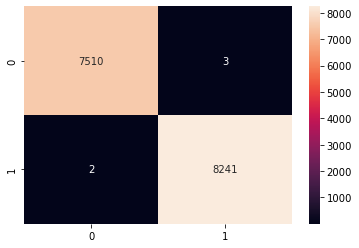

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_lgbmc)
sns.heatmap(confusion_matrix(y_train, y_train_pred_lgbmc), annot=True,fmt='d')

In [16]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train,y_train_pred_lgbmc))
print("Recall Score: ",recall_score(y_train, y_train_pred_lgbmc))
print("F1 Score: ",f1_score(y_train, y_train_pred_lgbmc))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_lgbmc))

Precision Score:  0.9996360989810772
Recall Score:  0.9997573698896033
F1 Score:  0.9996967307575666
Accuracy Score:  0.9996826605737497


#### Hyper-parameter Tuning for LightGBM

In [17]:
%%time
from sklearn.model_selection import GridSearchCV

lgb=lgb.LGBMClassifier()
#Define the parameters
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}

#Define the scoring
grid_search_lgbmc_clf=GridSearchCV(lgb,parameters,scoring='accuracy')
grid_search_lgbmc_clf.fit(X_train, y_train.values.ravel())


Wall time: 36min 17s


GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [-1, 5, 10, 20],
                         'min_child_samples': [5, 10, 15],
                         'num_leaves': [20, 40, 60, 80, 100],
                         'reg_alpha': [0, 0.01, 0.03]},
             scoring='accuracy')

In [18]:
cvres = pd.DataFrame(grid_search_lgbmc_clf.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

Rank 1# - Score: 0.9968533910693325 - {'learning_rate': 0.2, 'max_depth': -1, 'min_child_samples': 10, 'num_leaves': 60, 'reg_alpha': 0}
Rank 2# - Score: 0.9968533809690365 - {'learning_rate': 0.2, 'max_depth': 20, 'min_child_samples': 15, 'num_leaves': 40, 'reg_alpha': 0}
Rank 3# - Score: 0.9968215443276298 - {'learning_rate': 0.2, 'max_depth': 20, 'min_child_samples': 15, 'num_leaves': 80, 'reg_alpha': 0}
Rank 4# - Score: 0.9967897369722103 - {'learning_rate': 0.2, 'max_depth': 20, 'min_child_samples': 10, 'num_leaves': 80, 'reg_alpha': 0}
Rank 5# - Score: 0.9967896965684457 - {'learning_rate': 0.2, 'max_depth': 20, 'min_child_samples': 15, 'num_leaves': 60, 'reg_alpha': 0}
Rank 6# - Score: 0.9967578780954746 - {'learning_rate': 0.2, 'max_depth': 20, 'min_child_samples': 10, 'num_leaves': 40, 'reg_alpha': 0}
Rank 6# - Score: 0.9967578780954746 - {'learning_rate': 0.2, 'max_depth': 10, 'min_child_samples': 15, 'num_leaves': 100, 'reg_alpha': 0}
Rank 8# - Score: 0.9967578679942107 - {'

In [19]:
grid_search_lgbmc_clf.best_estimator_

LGBMClassifier(learning_rate=0.2, min_child_samples=10, num_leaves=60,
               reg_alpha=0)

#### Evaluating on Test set 

In [20]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
y_test_pred_lgbmc = grid_search_lgbmc_clf.best_estimator_.predict(X_test)


print("Precision Score: ",precision_score(y_test, y_test_pred_lgbmc))
print("Recall Score: ",recall_score(y_test, y_test_pred_lgbmc))
print("F1 Score: ",f1_score(y_test, y_test_pred_lgbmc))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_lgbmc))

Precision Score:  0.9902386117136659
Recall Score:  0.9967248908296943
F1 Score:  0.9934711643090316
Accuracy Score:  0.9931467732724157


In [21]:
from sklearn import metrics
#calculate AUC of model
auc_lgbmc = metrics.roc_auc_score(y_test, y_test_pred_lgbmc)
print(auc_lgbmc)

0.9929732238579609


In [22]:
cohen_score_lgbmc = cohen_kappa_score(y_test, y_test_pred_lgbmc)

In [23]:
acc_list.append(accuracy_score(y_test, y_test_pred_lgbmc))
auc_list.append(auc_lgbmc)
kappa_list.append(cohen_score_lgbmc)

## RIPPER
The Ripper method is a classification algorithm based on rules. The training set is used to generate a set of rules. It’s a common rule-induction algorithm

In [24]:
import wittgenstein as lw
ripper_clf = lw.RIPPER() # Or irep_clf = lw.IREP() to build a model using IREP
ripper_clf.fit(X_train, y_train.values.ravel()) # Or pass X and y data to .fit
ripper_clf

<RIPPER(max_rules=None, random_state=None, prune_size=0.33, max_total_conds=None, n_discretize_bins=10, k=2, dl_allowance=64, max_rule_conds=None, verbosity=0) with fit ruleset>

The model predicts positive class if any of the inner-nested condition-combinations are all true.  The word that you will often see that indicates a union is "or" and intersection is "and"

In [25]:
ripper_clf.out_model()

[[Type=0.0348969159415116 ^ TorqueNm=>0.89 ^ Toolwearmin=<0.12] V
[Type=0.0348969159415116 ^ TorqueNm=0.8-0.89 ^ Toolwearmin=0.76-0.83] V
[TorqueNm=>0.89] V
[Toolwearmin=>0.86 ^ Type=0.0348969159415116 ^ TorqueNm=0.61-0.71] V
[Toolwearmin=0.83-0.86 ^ Type=0.0348969159415116 ^ TorqueNm=0.8-0.89] V
[Type=0.0348969159415116 ^ TorqueNm=0.71-0.8 ^ Toolwearmin=0.83-0.86] V
[Toolwearmin=>0.86 ^ TorqueNm=0.71-0.8] V
[Rotationalspeedrpm=0.16-0.24 ^ Type=0.0348969159415116 ^ AirtemperatureK=0.81-0.87] V
[Rotationalspeedrpm=0.24-0.29 ^ AirtemperatureK=0.81-0.87 ^ Type=0.0348969159415116] V
[Toolwearmin=>0.86 ^ Type=0.0348969159415116 ^ Rotationalspeedrpm=<0.16] V
[Rotationalspeedrpm=0.29-0.34 ^ AirtemperatureK=0.81-0.87] V
[Rotationalspeedrpm=0.16-0.24 ^ AirtemperatureK=>0.87 ^ ProcesstemperatureK=0.8-0.89] V
[Toolwearmin=>0.86 ^ TorqueNm=0.51-0.61 ^ Rotationalspeedrpm=0.29-0.34] V
[Toolwearmin=0.83-0.86 ^ Type=0.0348969159415116 ^ Rotationalspeedrpm=0.16-0.24] V
[Toolwearmin=>0.86 ^ Rotationalsp

In [26]:
from sklearn.metrics import precision_score, recall_score

y_train_pred_ripper = ripper_clf.predict(X_train)

#Default scoring metric is accuracy.
accuracy = ripper_clf.score(X_train,  y_train.values.ravel())
precision = ripper_clf.score(X_train,  y_train.values.ravel())
recall = ripper_clf.score(X_train,  y_train.values.ravel())
cond_count = ripper_clf.ruleset_.count_conds()
print(f'accuracy: {accuracy} precision: {precision} recall: {recall} conds: {cond_count}')

accuracy: 0.5854912414318355 precision: 0.5854912414318355 recall: 0.5854912414318355 conds: 193


<AxesSubplot:>

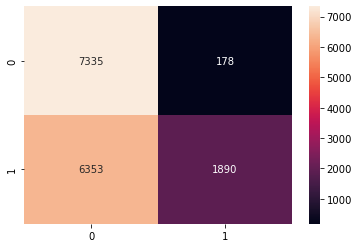

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_ripper)
sns.heatmap(confusion_matrix(y_train, y_train_pred_ripper), annot=True,fmt='d')

#### Evaluating on Test set 

In [28]:
from sklearn.metrics import precision_score, recall_score

y_test_pred_ripper = ripper_clf.predict(X_test)

#Default scoring metric is accuracy.
accuracy = ripper_clf.score(X_test,  y_test.values.ravel())
precision = ripper_clf.score(X_test, y_test.values.ravel(), precision_score)
recall = ripper_clf.score(X_test, y_test.values.ravel(), recall_score)
cond_count = ripper_clf.ruleset_.count_conds()
print(f'accuracy: {accuracy} precision: {precision} recall: {recall} conds: {cond_count}')

accuracy: 0.7932609937178755 precision: 0.9679054054054054 recall: 0.6255458515283843 conds: 193


In [29]:
from sklearn import metrics
#calculate AUC of model
auc_ripper = metrics.roc_auc_score(y_test, y_test_pred_ripper)
print(auc_ripper)

0.8013956802552101


In [30]:
cohen_score_ripper = cohen_kappa_score(y_test, y_test_pred_ripper)

In [31]:
acc_list.append(accuracy)
auc_list.append(auc_ripper)
kappa_list.append(cohen_score_ripper)

We can also ask our model to tell us why it made each positive prediction that it did:

In [32]:
ripper_clf.predict(X_test, give_reasons=True)

([False,
  True,
  True,
  True,
  False,
  False,
  True,
  False,
  True,
  False,
  False,
  True,
  False,
  True,
  False,
  True,
  False,
  True,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  False,
  True,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  False,
  True,
  False,
  False,
  False,
  True,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  True,
  True,
  True,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  True,
  True,
  False,
  True,
  False,
  True,
  False,
  True,
  True,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  False,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  False,
  True,
  True,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  True,
  True,
  False,
  False,
  False,
  False,
  Fals

In [33]:
give_reasons = ripper_clf.predict(X_test, give_reasons=True)
np.shape(give_reasons)

C:\Users\mario\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


(2, 1751)

In [34]:
give_reasons[1]

[[],
 [<Rule [Toolwearmin=0.83-0.86^ProcesstemperatureK=0.29-0.41^TorqueNm=0.51-0.61]>],
 [<Rule [TorqueNm=>0.89]>],
 [<Rule [Toolwearmin=>0.86^TorqueNm=0.71-0.8]>,
  <Rule [Toolwearmin=>0.86^Type=0.0348969159415116]>],
 [],
 [],
 [<Rule [Toolwearmin=>0.86^TorqueNm=0.71-0.8]>,
  <Rule [Toolwearmin=>0.86^Type=0.0348969159415116]>],
 [],
 [<Rule [Toolwearmin=0.83-0.86^Type=0.0348969159415116^TorqueNm=0.61-0.71]>],
 [],
 [],
 [<Rule [Toolwearmin=>0.86^Rotationalspeedrpm=0.81-0.93]>,
  <Rule [Toolwearmin=>0.86^Type=0.0348969159415116]>],
 [],
 [<Rule [Rotationalspeedrpm=0.16-0.24^AirtemperatureK=0.76-0.81]>],
 [],
 [<Rule [Toolwearmin=>0.86^TorqueNm=0.71-0.8]>,
  <Rule [Toolwearmin=>0.86^Type=0.0348969159415116]>],
 [],
 [<Rule [TorqueNm=0.8-0.89]>,
  <Rule [Rotationalspeedrpm=0.24-0.29^AirtemperatureK=0.76-0.81]>],
 [],
 [],
 [],
 [<Rule [TorqueNm=>0.89]>],
 [<Rule [TorqueNm=>0.89]>],
 [<Rule [Toolwearmin=>0.86^TorqueNm=0.71-0.8]>,
  <Rule [Toolwearmin=>0.86^Type=0.0348969159415116]>],
 [

## K-Nearest Neighbour (KNN)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier()

In [36]:
#Predict the response for train dataset
y_train_pred_knn = knn.predict(X_train)

print("K-Nearest Neighbour score: ",knn.score(X_train, y_train))

K-Nearest Neighbour score:  0.9701700939324702


<AxesSubplot:>

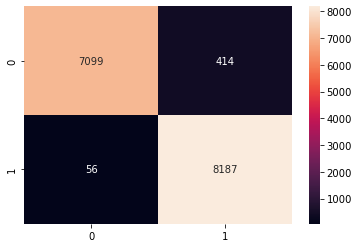

In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_knn)
sns.heatmap(confusion_matrix(y_train, y_train_pred_knn), annot=True,fmt='d')

In [38]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train,y_train_pred_knn))
print("Recall Score: ",recall_score(y_train, y_train_pred_knn))
print("F1 Score: ",f1_score(y_train, y_train_pred_knn))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_knn))

Precision Score:  0.9518660620858039
Recall Score:  0.9932063569088924
F1 Score:  0.9720968890999762
Accuracy Score:  0.9701700939324702


#### Hyper-parameter Tuning for K-Nearest Neighbour (KNN)

In [39]:
%%time
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

grid_search_knn.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Wall time: 4.31 s


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [40]:
cvres = pd.DataFrame(grid_search_knn.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

Rank 1# - Score: 0.9793501324342377 - {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Rank 2# - Score: 0.9784424260588649 - {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Rank 3# - Score: 0.9775338768170418 - {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Rank 4# - Score: 0.9775014130116157 - {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Rank 5# - Score: 0.9771442399676492 - {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
Rank 6# - Score: 0.9769818454176641 - {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Rank 7# - Score: 0.97675444768834 - {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
Rank 7# - Score: 0.97675444768834 - {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Rank 9# - Score: 0.9760069106918263 - {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}
Rank 9# - Score: 0.9760069106918263 - {'metric': 'euclidean', 'n_neighbors':

In [41]:
grid_search_knn.best_estimator_

KNeighborsClassifier(metric='manhattan', weights='distance')

#### Evaluating on Test set 

In [42]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
y_test_pred_knn = grid_search_knn.best_estimator_.predict(X_test)


print("Precision Score: ",precision_score(y_test, y_test_pred_knn))
print("Recall Score: ",recall_score(y_test, y_test_pred_knn))
print("F1 Score: ",f1_score(y_test, y_test_pred_knn))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_knn))

Precision Score:  0.9491173416407062
Recall Score:  0.9978165938864629
F1 Score:  0.9728579031399681
Accuracy Score:  0.970873786407767


In [43]:
from sklearn import metrics
#calculate AUC of model
auc_knn = metrics.roc_auc_score(y_test, y_test_pred_knn)
print(auc_knn)

0.969566979577962


In [44]:
cohen_score_knn = cohen_kappa_score(y_test, y_test_pred_knn)

In [45]:
acc_list.append(accuracy_score(y_test, y_test_pred_knn))
auc_list.append(auc_knn)
kappa_list.append(cohen_score_knn)

## Decision Tree 

In [46]:
# Create Decision Tree classifer object
dt_clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_clf.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [47]:
#Predict the response for train dataset
y_train_pred_dt = dt_clf.predict(X_train)

print("Decision Tree score: ",dt_clf.score(X_train, y_train))

Decision Tree score:  1.0


<AxesSubplot:>

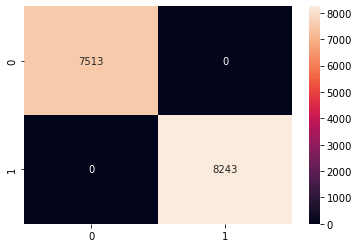

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_dt)
sns.heatmap(confusion_matrix(y_train, y_train_pred_dt), annot=True,fmt='d')

In [49]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train,y_train_pred_dt))
print("Recall Score: ",recall_score(y_train, y_train_pred_dt))
print("F1 Score: ",f1_score(y_train, y_train_pred_dt))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_dt))

Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0
Accuracy Score:  1.0


#### Fine Tuning for Decision Tree

In [50]:
%%time
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt_clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


grid_search.fit(X_train, y_train.values.ravel())

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 1.15 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [51]:
cvres = pd.DataFrame(grid_search.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

Rank 1# - Score: 0.9895044546401643 - {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}
Rank 2# - Score: 0.9875783475946226 - {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}
Rank 3# - Score: 0.9871605290576981 - {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}
Rank 4# - Score: 0.9871283818451501 - {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}
Rank 5# - Score: 0.9868711664458659 - {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 10}
Rank 6# - Score: 0.9866782108928541 - {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10}
Rank 7# - Score: 0.986163478175258 - {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10}
Rank 8# - Score: 0.9855840825379747 - {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10}
Rank 9# - Score: 0.9852942569532063 - {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 20}
Rank 10# - Score: 0.9848110247688232 - {'criterion': 'gini', 'max_depth': 20, 'mi

In [52]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5)

#### Evaluating on Test set 

In [53]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
y_test_pred_dt = grid_search.best_estimator_.predict(X_test)


print("Precision Score: ",precision_score(y_test, y_test_pred_dt))
print("Recall Score: ",recall_score(y_test, y_test_pred_dt))
print("F1 Score: ",f1_score(y_test, y_test_pred_dt))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_dt))

Precision Score:  0.9729144095341279
Recall Score:  0.980349344978166
F1 Score:  0.9766177270255575
Accuracy Score:  0.9754426042261565


In [54]:
from sklearn import metrics
#calculate AUC of model
auc_dt = metrics.roc_auc_score(y_test, y_test_pred_dt)
print(auc_dt)

0.9752046126088434


In [55]:
cohen_score_dt = cohen_kappa_score(y_test, y_test_pred_dt)

In [56]:
acc_list.append(accuracy_score(y_test, y_test_pred_dt))
auc_list.append(auc_dt)
kappa_list.append(cohen_score_dt)

## MLPClassifier

In [57]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train,y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(50, 100, 50), max_iter=300)

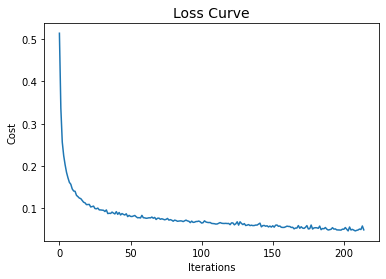

In [58]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [59]:
#Predict the response for train dataset
y_train_pred_mlp_clf = mlp_clf.predict(X_train)

print("MLPClassifier score: ",mlp_clf.score(X_train, y_train))

MLPClassifier score:  0.9855293221629855


<AxesSubplot:>

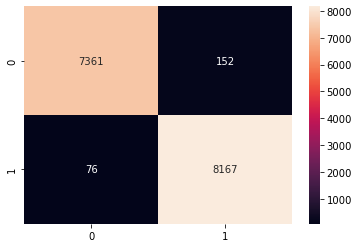

In [60]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_mlp_clf)
sns.heatmap(confusion_matrix(y_train, y_train_pred_mlp_clf), annot=True,fmt='d')

In [61]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train,y_train_pred_mlp_clf))
print("Recall Score: ",recall_score(y_train, y_train_pred_mlp_clf))
print("F1 Score: ",f1_score(y_train, y_train_pred_mlp_clf))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_mlp_clf))

Precision Score:  0.9817285731458107
Recall Score:  0.9907800558049253
F1 Score:  0.9862335466731071
Accuracy Score:  0.9855293221629855


#### Hyper Parameter Tuning

In [62]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

mlp = MLPClassifier(max_iter=300)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train,y_train.values.ravel())
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.901 (+/-0.011) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.979 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.908 (+/-0.019) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.980 (+/-0.003) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.889 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.979 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver

C:\Users\mario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [63]:
clf.best_estimator_

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 100, 50),
              learning_rate='adaptive', max_iter=300)

#### Evaluating on Test set 

In [64]:
#Predict the response for test dataset
y_test_pred_mlp_clf = clf.best_estimator_.predict(X_test)

print("Precision Score: ",precision_score(y_test, y_test_pred_mlp_clf))
print("Recall Score: ",recall_score(y_test, y_test_pred_mlp_clf))
print("F1 Score: ",f1_score(y_test, y_test_pred_mlp_clf))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_mlp_clf))

Precision Score:  0.9743315508021391
Recall Score:  0.9945414847161572
F1 Score:  0.984332793084819
Accuracy Score:  0.9834380354083381


In [65]:
from sklearn.metrics import classification_report

# confusion matrix
print(confusion_matrix(y_test, y_test_pred_mlp_clf)) # order matters! (actual, predicted)

print(classification_report(y_test, y_test_pred_mlp_clf))

[[811  24]
 [  5 911]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       835
           1       0.97      0.99      0.98       916

    accuracy                           0.98      1751
   macro avg       0.98      0.98      0.98      1751
weighted avg       0.98      0.98      0.98      1751



In [66]:
#calculate AUC of model
from sklearn import metrics
auc_ann = metrics.roc_auc_score(y_test, y_test_pred_mlp_clf)
print(auc_ann)

0.9828994848730487


In [67]:
cohen_score_ann = cohen_kappa_score(y_test, y_test_pred_mlp_clf)

In [68]:
acc_list.append(metrics.accuracy_score(y_test, y_test_pred_mlp_clf))
auc_list.append(metrics.roc_auc_score(y_test, y_test_pred_mlp_clf))
kappa_list.append(cohen_score_ann)

## Support Vector Machine

In [69]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
svm_clf.fit(X_train, y_train.values.ravel())

SVC(kernel='linear', probability=True)

In [70]:
#Predict the response for train dataset
y_train_pred_svm = svm_clf.predict(X_train)

print("Support Vector Machine score: ",svm_clf.score(X_train, y_train))

Support Vector Machine score:  0.8378395531860878


<AxesSubplot:>

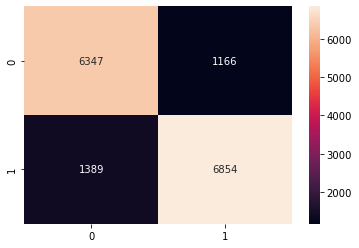

In [71]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_svm)
sns.heatmap(confusion_matrix(y_train, y_train_pred_svm), annot=True,fmt='d')

In [72]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train, y_train_pred_svm))
print("Recall Score: ",recall_score(y_train, y_train_pred_svm))
print("F1 Score: ",f1_score(y_train, y_train_pred_svm))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_svm))

Precision Score:  0.8546134663341646
Recall Score:  0.8314933883294917
F1 Score:  0.8428949148373608
Accuracy Score:  0.8378395531860878


#### Fine Tuning for Support Vector Machine

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

rnd_search_svm = GridSearchCV(svm_clf,param_grid,refit=True,verbose=2)
rnd_search_svm.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  44.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  44.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  44.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  44.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  45.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  22.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  23.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  23.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  23.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  23.6s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time= 1.3min
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time= 1.0min
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time= 1.1min
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time= 1.0min
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time= 1.1min
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.6min
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.6min
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=14.3min
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.6min
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.7min
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time= 1.2min
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time= 1.2min
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time= 1.2min
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=  23.7s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=  23.7s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=  49.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=  49.7s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=  51.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=  49.3s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=  51.9s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  55.8s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  56.1s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  58.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  57.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  57.1s
[CV] END ...................

GridSearchCV(estimator=SVC(kernel='linear', probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [74]:
cvres = pd.DataFrame(rnd_search_svm.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

Rank 1# - Score: 0.9842631216215801 - {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Rank 2# - Score: 0.9799008765877644 - {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Rank 3# - Score: 0.9726522075261009 - {'C': 100, 'gamma': 1, 'kernel': 'poly'}
Rank 4# - Score: 0.9713136517052217 - {'C': 10, 'gamma': 1, 'kernel': 'poly'}
Rank 5# - Score: 0.9706926928951986 - {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Rank 6# - Score: 0.9677131613427531 - {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Rank 7# - Score: 0.9673851161513131 - {'C': 1, 'gamma': 1, 'kernel': 'poly'}
Rank 8# - Score: 0.959546035339637 - {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Rank 9# - Score: 0.9595129608412476 - {'C': 100, 'gamma': 0.1, 'kernel': 'poly'}
Rank 10# - Score: 0.9516758473040772 - {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Rank 11# - Score: 0.9461578604915467 - {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Rank 12# - Score: 0.9379385362821396 - {'C': 10, 'gamma': 0.1, 'kernel': 'poly'}
Rank 13# - Score: 0.9362793477843441 - {'C': 100, 'gamma

In [75]:
rnd_search_svm.best_estimator_

SVC(C=100, gamma=1, probability=True)

#### Evaluating on Test set


In [76]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
y_test_pred_svm = rnd_search_svm.best_estimator_.predict(X_test)
#y_test_pred_sgd = sgd_clf.predict(X_test)

print("Precision Score: ",precision_score(y_test, y_test_pred_svm))
print("Recall Score: ",recall_score(y_test, y_test_pred_svm))
print("F1 Score: ",f1_score(y_test, y_test_pred_svm))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_svm))

Precision Score:  0.9626467449306296
Recall Score:  0.9847161572052402
F1 Score:  0.9735563950350782
Accuracy Score:  0.9720159908623643


In [77]:
from sklearn import metrics
#calculate AUC of model
auc_svm = metrics.roc_auc_score(y_test, y_test_pred_svm)
print(auc_svm)

0.9713999947702847


In [78]:
cohen_score_svm = cohen_kappa_score(y_test, y_test_pred_svm)

In [79]:
acc_list.append(accuracy_score(y_test, y_test_pred_svm))
auc_list.append(auc_svm)
kappa_list.append(cohen_score_svm)

## Gaussian Naive Bayes Classifier

In [80]:
%%time
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train.values.ravel())

Wall time: 7.01 ms


GaussianNB()

#### Evaluating on Training Set

In [81]:
#Predict the response for train dataset
y_train_pred_nb = nb_clf.predict(X_train)

print("Naive Bayes score: ",nb_clf.score(X_train, y_train))

Naive Bayes score:  0.8285732419395786


<AxesSubplot:>

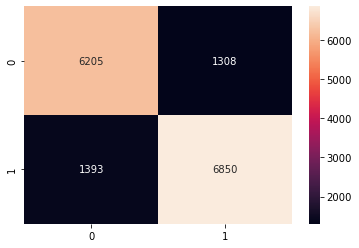

In [82]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_nb)
sns.heatmap(confusion_matrix(y_train, y_train_pred_nb), annot=True,fmt='d')

In [83]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train, y_train_pred_nb))
print("Recall Score: ",recall_score(y_train, y_train_pred_nb))
print("F1 Score: ",f1_score(y_train, y_train_pred_nb))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_nb))

Precision Score:  0.839666584947291
Recall Score:  0.8310081281086983
F1 Score:  0.835314919821962
Accuracy Score:  0.8285732419395786


### Hyper-parameter Tuning for Gaussian Naive Bayes

In [84]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

NB_distribution = {'var_smoothing': np.logspace(0,-9, num=100)}

nb_clf = GaussianNB()       

rnd_search_nb = RandomizedSearchCV(nb_clf, param_distributions = NB_distribution, random_state = 42) 
rnd_search_nb.fit(X_train, y_train.values.ravel()) 

Wall time: 272 ms


RandomizedSearchCV(estimator=GaussianNB(),
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=42)

In [85]:
cvres = pd.DataFrame(rnd_search_nb.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

Rank 1# - Score: 0.9102954324430825 - {'var_smoothing': 2.848035868435799e-08}
Rank 1# - Score: 0.9102954324430825 - {'var_smoothing': 1.5199110829529332e-05}
Rank 1# - Score: 0.9102954324430825 - {'var_smoothing': 4.3287612810830526e-07}
Rank 1# - Score: 0.9102954324430825 - {'var_smoothing': 8.111308307896872e-05}
Rank 1# - Score: 0.9102954324430825 - {'var_smoothing': 0.0001}
Rank 1# - Score: 0.9102954324430825 - {'var_smoothing': 0.0002848035868435802}
Rank 1# - Score: 0.9102954324430825 - {'var_smoothing': 5.336699231206302e-08}
Rank 8# - Score: 0.9099118325432533 - {'var_smoothing': 0.01}
Rank 9# - Score: 0.9077818998940024 - {'var_smoothing': 0.12328467394420659}
Rank 10# - Score: 0.8995645141853625 - {'var_smoothing': 1.0}


In [86]:
rnd_search_nb.best_estimator_

GaussianNB(var_smoothing=2.848035868435799e-08)

#### Evaluating on Test set

In [87]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
#y_test_pred_nb = nb_clf.predict(X_test)
y_test_pred_nb = rnd_search_nb.best_estimator_.predict(X_test)

print("Precision Score: ",precision_score(y_test, y_test_pred_nb))
print("Recall Score: ",recall_score(y_test, y_test_pred_nb))
print("F1 Score: ",f1_score(y_test, y_test_pred_nb))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_nb))

Precision Score:  0.8450704225352113
Recall Score:  0.851528384279476
F1 Score:  0.8482871125611745
Accuracy Score:  0.8406624785836665


In [88]:
#calculate AUC of model
from sklearn import metrics
auc_nb = metrics.roc_auc_score(y_test, y_test_pred_nb)
print(auc_nb)

0.8401354496247679


In [89]:
cohen_score_nb = cohen_kappa_score(y_test, y_test_pred_nb)

In [90]:
acc_list.append(accuracy_score(y_test, y_test_pred_nb))
auc_list.append(auc_nb)
kappa_list.append(cohen_score_nb)

## Stochastic Gradient Descent

In [91]:
%%time
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train.values.ravel())

Wall time: 26.9 ms


SGDClassifier(random_state=42)

#### Evaluating on Train set

In [92]:
#Predict the response for train dataset
y_train_pred_sgd = sgd_clf.predict(X_train)
print("Stochastic Gradient Descent Classifier score: ",sgd_clf.score(X_train, y_train))

Stochastic Gradient Descent Classifier score:  0.837014470677837


<AxesSubplot:>

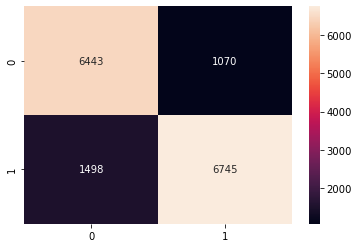

In [93]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_sgd)
sns.heatmap(confusion_matrix(y_train, y_train_pred_sgd), annot=True,fmt='d')

In [94]:
#Performance measures for training dataset
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train, y_train_pred_sgd))
print("Recall Score: ",recall_score(y_train, y_train_pred_sgd))
print("F1 Score: ",f1_score(y_train, y_train_pred_sgd))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_sgd))

Precision Score:  0.8630838131797824
Recall Score:  0.8182700473128716
F1 Score:  0.8400797110474529
Accuracy Score:  0.837014470677837


### Fine Tuning for Stochastic Gradient Descent

In [95]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

param_distribs = {
        "average": [True, False],
        "loss":['hinge', 'log_loss', 'modified_huber', 'squared_hinge',  'perceptron'],
        "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        "learning_rate":['constant', 'optimal', 'invscaling', 'adaptive'],
        "class_weight":[{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
        "eta0":[1, 10, 100],
        "penalty":['l2', 'l1', 'elasticnet']
    }
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
rnd_search_SGD = RandomizedSearchCV(sgd_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search_SGD.fit(X_train, y_train.values.ravel())

Wall time: 2.92 s


RandomizedSearchCV(cv=5, estimator=SGDClassifier(random_state=42),
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100, 1000],
                                        'average': [True, False],
                                        'class_weight': [{0: 0.5, 1: 0.5},
                                                         {0: 0.6, 1: 0.4},
                                                         {0: 0.4, 1: 0.6},
                                                         {0: 0.3, 1: 0.7}],
                                        'eta0': [1, 10, 100],
                                        'learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                                                          'adaptive'],
                                        'loss': ['hinge', 'log_loss',
                                                 'modified_huber',
                                                 'squared_hinge',
                                                 'perceptron'],
                                        'penalty': ['l2', 'l1', 'elasticnet']},
                   random_state=42, scoring='accuracy')

In [96]:
cvres = pd.DataFrame(rnd_search_SGD.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

Rank 1# - Score: 0.9071522370988951 - {'penalty': 'l1', 'loss': 'squared_hinge', 'learning_rate': 'constant', 'eta0': 10, 'class_weight': {1: 0.5, 0: 0.5}, 'average': True, 'alpha': 10}
Rank 2# - Score: 0.906067190289876 - {'penalty': 'elasticnet', 'loss': 'log_loss', 'learning_rate': 'optimal', 'eta0': 100, 'class_weight': {1: 0.5, 0: 0.5}, 'average': False, 'alpha': 0.0001}
Rank 3# - Score: 0.7233019967409637 - {'penalty': 'l1', 'loss': 'log_loss', 'learning_rate': 'invscaling', 'eta0': 100, 'class_weight': {1: 0.7, 0: 0.3}, 'average': False, 'alpha': 0.1}
Rank 4# - Score: 0.7168231352145172 - {'penalty': 'l1', 'loss': 'log_loss', 'learning_rate': 'constant', 'eta0': 100, 'class_weight': {1: 0.6, 0: 0.4}, 'average': False, 'alpha': 1000}
Rank 5# - Score: 0.7103745348021926 - {'penalty': 'l1', 'loss': 'perceptron', 'learning_rate': 'adaptive', 'eta0': 100, 'class_weight': {1: 0.6, 0: 0.4}, 'average': False, 'alpha': 0.1}
Rank 6# - Score: 0.7038231407485448 - {'penalty': 'l1', 'loss': 

In [97]:
rnd_search_SGD.best_estimator_

SGDClassifier(alpha=10, average=True, class_weight={0: 0.5, 1: 0.5}, eta0=10,
              learning_rate='constant', loss='squared_hinge', penalty='l1',
              random_state=42)

#### Evaluating on Test set

In [98]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
y_test_pred_sgd = rnd_search_SGD.best_estimator_.predict(X_test)
#y_test_pred_sgd = sgd_clf.predict(X_test)

print("Precision Score: ",precision_score(y_test, y_test_pred_sgd))
print("Recall Score: ",recall_score(y_test, y_test_pred_sgd))
print("F1 Score: ",f1_score(y_test, y_test_pred_sgd))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_sgd))

Precision Score:  0.8190279214064116
Recall Score:  0.8646288209606987
F1 Score:  0.8412108337758896
Accuracy Score:  0.8292404340376928


In [99]:
from sklearn import metrics
#calculate AUC of model
auc_sgd = metrics.roc_auc_score(y_test, y_test_pred_sgd)
print(auc_sgd)

0.8275239913186727


In [100]:
cohen_score_sgd = cohen_kappa_score(y_test, y_test_pred_sgd)

In [101]:
acc_list.append(accuracy_score(y_test, y_test_pred_sgd))
auc_list.append(auc_sgd)
kappa_list.append(cohen_score_sgd)

## Logistic Regression

In [102]:
%%time
#logistic regression for targets 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_predict

log_clf = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=42)
log_clf.fit(X_train, y_train.values.ravel())

Wall time: 24.8 ms


LogisticRegression(max_iter=200, random_state=42, solver='saga', tol=0.01)

#### Evaluating on Train set

In [103]:
#Predict the response for train dataset
y_train_pred_log = log_clf.predict(X_train)
print("Logistic Regression score: ",log_clf.score(X_train, y_train))

Logistic Regression score:  0.8230515359228231


<AxesSubplot:>

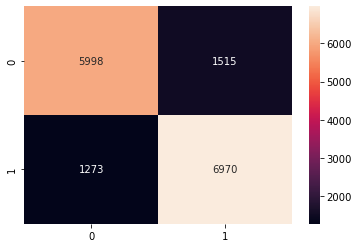

In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix(y_train, y_train_pred_log)
sns.heatmap(confusion_matrix(y_train, y_train_pred_log), annot=True,fmt='d')

In [105]:
#Performance measures for training dataset
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train, y_train_pred_log))
print("Recall Score: ",recall_score(y_train, y_train_pred_log))
print("F1 Score: ",f1_score(y_train, y_train_pred_log))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_log))

Precision Score:  0.8214496169711255
Recall Score:  0.8455659347325003
F1 Score:  0.8333333333333333
Accuracy Score:  0.8230515359228231


### Fine Tuning for Logistic Regression

In [106]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=42)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2'],
                     solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
rnd_search_LR = RandomizedSearchCV(logistic, distributions, random_state=42)
rnd_search_LR.fit(X_train, y_train.values.ravel())

Wall time: 1.01 s


RandomizedSearchCV(estimator=LogisticRegression(max_iter=200, random_state=42,
                                                solver='saga', tol=0.01),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015460712A60>,
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42)

In [107]:
cvres = pd.DataFrame(rnd_search_LR.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

Rank 1# - Score: 0.9078167260215584 - {'C': 0.08233797718320979, 'penalty': 'l2', 'solver': 'lbfgs'}
Rank 2# - Score: 0.9077817002499292 - {'C': 0.7337391594646552, 'penalty': 'l2', 'solver': 'saga'}
Rank 2# - Score: 0.9077817002499292 - {'C': 0.7272998688284025, 'penalty': 'l2', 'solver': 'saga'}
Rank 4# - Score: 0.9076768366779415 - {'C': 1.8369955678634686, 'penalty': 'l2', 'solver': 'saga'}
Rank 5# - Score: 0.9075020001483654 - {'C': 1.49816047538945, 'penalty': 'l2', 'solver': 'saga'}
Rank 6# - Score: 0.9073970709646471 - {'C': 2.387400631785948, 'penalty': 'l2', 'solver': 'lbfgs'}
Rank 7# - Score: 0.9073620955724028 - {'C': 2.469926038510866, 'penalty': 'l2', 'solver': 'lbfgs'}
Rank 8# - Score: 0.9073271188319372 - {'C': 2.887995089067299, 'penalty': 'l2', 'solver': 'lbfgs'}
Rank 9# - Score: 0.9072921518404171 - {'C': 2.404460046972835, 'penalty': 'l2', 'solver': 'liblinear'}
Rank 10# - Score: 0.9072921407430938 - {'C': 0.6239780813448106, 'penalty': 'l2', 'solver': 'liblinear'}


In [108]:
rnd_search_LR.best_estimator_

LogisticRegression(C=0.08233797718320979, max_iter=200, random_state=42,
                   tol=0.01)

#### Evaluating on Test set

In [109]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
y_test_pred_log = rnd_search_LR.best_estimator_.predict(X_test)
#y_test_pred_log = log_clf.predict(X_test)

print("Precision Score: ",precision_score(y_test, y_test_pred_log))
print("Recall Score: ",recall_score(y_test, y_test_pred_log))
print("F1 Score: ",f1_score(y_test, y_test_pred_log))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_log))

Precision Score:  0.8215767634854771
Recall Score:  0.8646288209606987
F1 Score:  0.8425531914893616
Accuracy Score:  0.8309537407195888


In [110]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred_log)
#calculate AUC of model
auc_log = metrics.roc_auc_score(y_test, y_test_pred_log)
print(auc_log)

0.8293203985043014


In [111]:
cohen_score_log = cohen_kappa_score(y_test, y_test_pred_log)

In [112]:
acc_list.append(accuracy_score(y_test, y_test_pred_log))
auc_list.append(auc_log)
kappa_list.append(cohen_score_log)

## XGBOOST

In [113]:
!pip install xgboost

In [114]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [115]:
import xgboost as xgb
from xgboost import XGBClassifier

In [116]:
%%time
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train.values.ravel())

Wall time: 452 ms


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

#### Evaluating on Train set

In [117]:
#Predict the response for train dataset
y_train_pred_xgb = xgb_classifier.predict(X_train)
print("XGBoost score: ",xgb_classifier.score(X_train, y_train))

XGBoost score:  1.0


<AxesSubplot:>

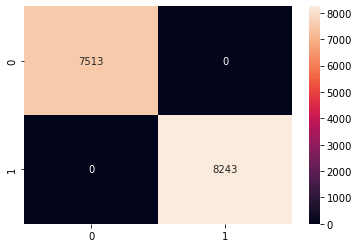

In [118]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix(y_train, y_train_pred_xgb)
sns.heatmap(confusion_matrix(y_train, y_train_pred_xgb), annot=True,fmt='d')


In [119]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train, y_train_pred_xgb))
print("Recall Score: ",recall_score(y_train, y_train_pred_xgb))
print("F1 Score: ",f1_score(y_train, y_train_pred_xgb))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_xgb))

Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0
Accuracy Score:  1.0


#### Fine Tuning for XGBoost

In [120]:
import warnings
warnings.filterwarnings('ignore')

In [121]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

xgb_classifier = XGBClassifier(random_state=42)

XG_distributions = dict(n_estimators=[100,200,300,400,500,600,700,800, 900, 1000],
                     max_depths = [2, 5, 10, 20],
                     learning_rate=[0.1,0.15,0.2,0.25,0.3],
                     colsample_bytree=[0.5,0.6,0.7,0.8,0.9,1],
                     subsample=[0.5,0.6,0.7,0.8,0.9,1],
                     grow_policy = ['depthwise', 'lossguide'],
                     booster = ['gbtree', 'gblinear', 'dart'],
                     sampling_method = ['uniform','gradient_based'])
rnd_search_XG = RandomizedSearchCV(xgb_classifier, XG_distributions, random_state=42)
rnd_search_XG.fit(X_train, y_train)

[01:03:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depths" } are not used.

[01:03:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depths" } are not used.

[01:03:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depths" } are not used.

[01:03:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depths" } are not used.

[01:03:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depths" } are not used.



[01:04:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "grow_policy", "max_depths", "sampling_method", "subsample" } are not used.

[01:04:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "grow_policy", "max_depths", "sampling_method", "subsample" } are not used.

[01:04:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "grow_policy", "max_depths", "sampling_method", "subsample" } are not used.

[01:04:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depths" } are not used.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1],
                                        'grow_policy': ['depthwise',
                                                        'lossguide'],
                                        'learning_rate': [0.1, 0.15, 0.2, 0.25,
                                                          0.3],
                                        'max_depths': [2, 5, 10, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000],
                                        'sampling_method': ['uniform',
                                                            'gradient_based'],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1]},
                   random_state=42)

In [122]:
cvres = pd.DataFrame(rnd_search_XG.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

Rank 1# - Score: 0.9963439332643715 - {'subsample': 0.8, 'sampling_method': 'uniform', 'n_estimators': 600, 'max_depths': 5, 'learning_rate': 0.25, 'grow_policy': 'depthwise', 'colsample_bytree': 0.8, 'booster': 'gbtree'}
Rank 2# - Score: 0.9959935355464774 - {'subsample': 0.8, 'sampling_method': 'uniform', 'n_estimators': 700, 'max_depths': 20, 'learning_rate': 0.2, 'grow_policy': 'depthwise', 'colsample_bytree': 0.8, 'booster': 'gbtree'}
Rank 3# - Score: 0.9957386445378571 - {'subsample': 0.6, 'sampling_method': 'uniform', 'n_estimators': 300, 'max_depths': 2, 'learning_rate': 0.25, 'grow_policy': 'depthwise', 'colsample_bytree': 0.6, 'booster': 'gbtree'}
Rank 4# - Score: 0.9947821127824779 - {'subsample': 1, 'sampling_method': 'gradient_based', 'n_estimators': 200, 'max_depths': 10, 'learning_rate': 0.1, 'grow_policy': 'lossguide', 'colsample_bytree': 0.5, 'booster': 'dart'}
Rank 5# - Score: 0.9080612587589445 - {'subsample': 0.9, 'sampling_method': 'gradient_based', 'n_estimators':

In [123]:
rnd_search_XG.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_depths=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=600,
              n_jobs=0, num_parallel_tree=1, predictor='auto', ...)

In [124]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [125]:
y_test_pred_xgb = rnd_search_XG.best_estimator_.predict(X_test)

<AxesSubplot:>

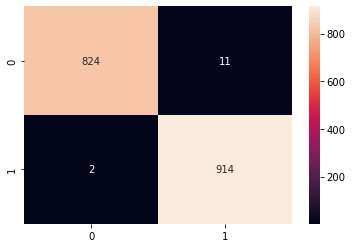

In [126]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_test_pred_xgb), annot=True,fmt='d')

In [127]:
#Performance measures for test dataset
from sklearn.metrics import precision_score, recall_score,f1_score 
print("Precision Score: ",precision_score(y_test, y_test_pred_xgb))
print("Recall Score: ",recall_score(y_test, y_test_pred_xgb))
print("F1 Score: ",f1_score(y_test, y_test_pred_xgb))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_xgb))

Precision Score:  0.9881081081081081
Recall Score:  0.9978165938864629
F1 Score:  0.9929386203150461
Accuracy Score:  0.9925756710451171


In [128]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred_xgb)
#calculate AUC of model
auc_xgb = metrics.roc_auc_score(y_test, y_test_pred_xgb)
print(auc_xgb)


0.992321470595926


In [129]:
cohen_score_xgb = cohen_kappa_score(y_test, y_test_pred_xgb)

In [130]:
acc_list.append(accuracy_score(y_test, y_test_pred_xgb))
auc_list.append(auc_xgb)
kappa_list.append(cohen_score_xgb)

## Draw ROC curve and PR curve

### For Training Set

In [131]:
from sklearn.metrics import roc_curve

#Fuzzy Cognitive Map
fpr_FCM, tpr_FCM, thresholds_FCM = roc_curve(y_train, y_train_pred_fcm)

#------------------------------------------------------------------------------------------------#

#LightGBM Classifier
fpr_LGBM, tpr_LGBM, thresholds_LGBM = roc_curve(y_train, y_train_pred_lgbmc)

#------------------------------------------------------------------------------------------------#

#RIPPER (Repeated Incremental Pruning to Produce Error Reduction)
fpr_RIPPER, tpr_RIPPER, thresholds_RIPPER = roc_curve(y_train, y_train_pred_ripper)

#------------------------------------------------------------------------------------------------#

#Decision Tree
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_train, y_train_pred_dt)

#------------------------------------------------------------------------------------------------#

#K-Nearest Neighbour (KNN)
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_train, y_train_pred_knn)

#------------------------------------------------------------------------------------------------#

#MLP Classifier
fpr_MLP, tpr_MLP, thresholds_MLP = roc_curve(y_train, y_train_pred_mlp_clf)

#------------------------------------------------------------------------------------------------#

#Support Vector Machine
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_train,  y_train_pred_svm)

#------------------------------------------------------------------------------------------------#

# Stochastic Gradient Descent
fpr_SGD, tpr_SGD, thresholds_SGD = roc_curve(y_train, y_train_pred_sgd)

#------------------------------------------------------------------------------------------------#

# Gaussian Naive Bayes
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_train, y_train_pred_nb)

#------------------------------------------------------------------------------------------------#

# Linear Regresison
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_train, y_train_pred_log)

#------------------------------------------------------------------------------------------------#

# XGBoost
fpr_XG, tpr_XG, thresholds_XG = roc_curve(y_train, y_train_pred_xgb)

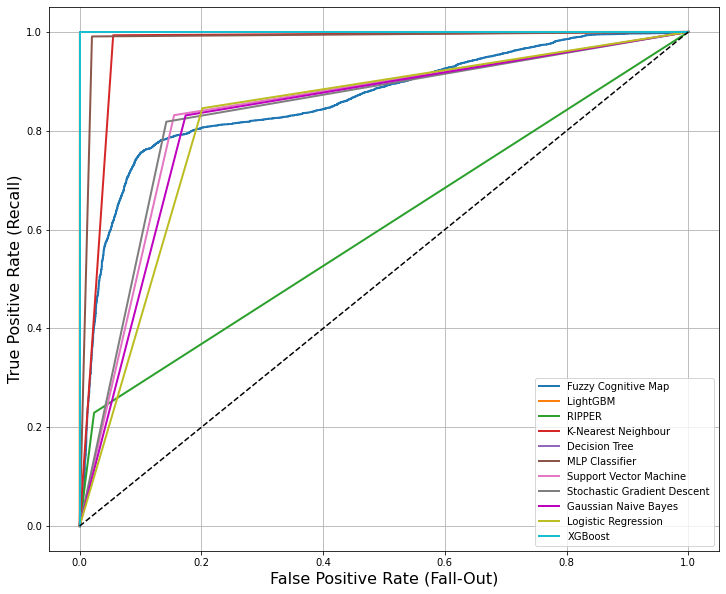

In [132]:
plt.figure(figsize=(12, 10))              

#Fuzzy Cognitive Map
plt.plot(fpr_FCM, tpr_FCM, linewidth=2, label="Fuzzy Cognitive Map")

#------------------------------------------------------------------------------------------------#

#LightGBM Classifier
plt.plot(fpr_LGBM, tpr_LGBM, linewidth=2, label="LightGBM")

#------------------------------------------------------------------------------------------------#

#RIPPER (Repeated Incremental Pruning to Produce Error Reduction)
plt.plot(fpr_RIPPER, tpr_RIPPER, linewidth=2, label="RIPPER")

#------------------------------------------------------------------------------------------------#

#K-Nearest Neighbour (KNN)
plt.plot(fpr_KNN, tpr_KNN, linewidth=2, label="K-Nearest Neighbour")

#------------------------------------------------------------------------------------------------#

#Decision Tree
plt.plot(fpr_DT, tpr_DT, linewidth=2, label="Decision Tree")

#------------------------------------------------------------------------------------------------#

#MLP Classifier
plt.plot(fpr_MLP, tpr_MLP, linewidth=2, label="MLP Classifier")

#------------------------------------------------------------------------------------------------#

#Support Vector Machine
plt.plot(fpr_SVM, tpr_SVM, linewidth=2, label="Support Vector Machine")

#------------------------------------------------------------------------------------------------#

# Stochastic Gradient Descent
plt.plot(fpr_SGD, tpr_SGD, linewidth=2, label="Stochastic Gradient Descent")

#------------------------------------------------------------------------------------------------#

# Gaussian Naive Bayes
plt.plot(fpr_NB, tpr_NB, "m-", linewidth=2, label="Gaussian Naive Bayes")

#------------------------------------------------------------------------------------------------#

# Linear Regresison
plt.plot(fpr_LR, tpr_LR, linewidth=2, label="Logistic Regression")

#------------------------------------------------------------------------------------------------#

# XGBoost
plt.plot(fpr_XG, tpr_XG, linewidth=2, label="XGBoost")

#------------------------------------------------------------------------------------------------#


# fpr_SGD_90 = fpr_SGD[np.argmax(tpr_SGD >= 0.9)]           

# plt.plot([fpr_SGD_90, fpr_SGD_90], [0., 0.9], "r:")
# plt.plot([0.0, fpr_SGD_90], [0.9, 0.9], "r:")  
# plt.plot([fpr_SGD_90], [0.9], "ro")   

# AUC curve
plt.plot([0, 1], [0, 1], 'k--')
# plt.axis([0, 1, 0, 1])



plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)

plt.legend(loc=4)
plt.grid(True)      
plt.show()

### For Test Set

In [133]:
from sklearn.metrics import roc_curve

#Fuzzy Cognitive Map
fpr_FCM, tpr_FCM, thresholds_FCM = roc_curve(y_test, y_test_pred_fcm)

#------------------------------------------------------------------------------------------------#

#LightGBM Classifier
fpr_LGBM, tpr_LGBM, thresholds_LGBM = roc_curve(y_test, y_test_pred_lgbmc)

#------------------------------------------------------------------------------------------------#

#RIPPER (Repeated Incremental Pruning to Produce Error Reduction)
fpr_RIPPER, tpr_RIPPER, thresholds_RIPPER = roc_curve(y_test, y_test_pred_ripper)

#------------------------------------------------------------------------------------------------#

#K-Nearest Neighbour (KNN)
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_test_pred_knn)

#------------------------------------------------------------------------------------------------#

#Decision Tree
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, y_test_pred_dt)

#------------------------------------------------------------------------------------------------#

#MLP Classifier
fpr_MLP, tpr_MLP, thresholds_MLP = roc_curve(y_test, y_test_pred_mlp_clf)

#------------------------------------------------------------------------------------------------#

#Support Vector Machine
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, y_test_pred_svm)

#------------------------------------------------------------------------------------------------#

# Stochastic Gradient Descent
fpr_SGD, tpr_SGD, thresholds_SGD = roc_curve(y_test, y_test_pred_sgd)

#------------------------------------------------------------------------------------------------#

# Gaussian Naive Bayes
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, y_test_pred_nb)

#------------------------------------------------------------------------------------------------#

# Linear Regresison
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_test_pred_log)

#------------------------------------------------------------------------------------------------#

# XGBoost
fpr_XG, tpr_XG, thresholds_XG = roc_curve(y_test, y_test_pred_xgb)

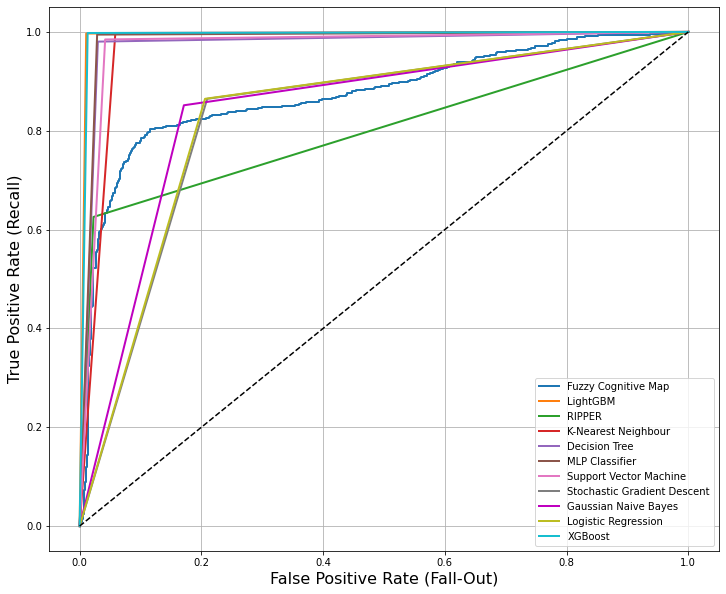

In [134]:
plt.figure(figsize=(12, 10))                                    

#Fuzzy Cognitive Map
plt.plot(fpr_FCM, tpr_FCM, linewidth=2, label="Fuzzy Cognitive Map")

#------------------------------------------------------------------------------------------------#

#LightGBM Classifier
plt.plot(fpr_LGBM, tpr_LGBM, linewidth=2, label="LightGBM")

#------------------------------------------------------------------------------------------------#

#RIPPER (Repeated Incremental Pruning to Produce Error Reduction)
plt.plot(fpr_RIPPER, tpr_RIPPER, linewidth=2, label="RIPPER")

#------------------------------------------------------------------------------------------------#

#K-Nearest Neighbour (KNN)
plt.plot(fpr_KNN, tpr_KNN, linewidth=2, label="K-Nearest Neighbour")

#------------------------------------------------------------------------------------------------#

#Decision Tree
plt.plot(fpr_DT, tpr_DT, linewidth=2, label="Decision Tree")

#------------------------------------------------------------------------------------------------#

#MLP Classifier
plt.plot(fpr_MLP, tpr_MLP, linewidth=2, label="MLP Classifier")


#------------------------------------------------------------------------------------------------#

#Support Vector Machine
plt.plot(fpr_SVM, tpr_SVM, linewidth=2, label="Support Vector Machine")


#------------------------------------------------------------------------------------------------#

# Stochastic Gradient Descent
plt.plot(fpr_SGD, tpr_SGD, linewidth=2, label="Stochastic Gradient Descent")


#------------------------------------------------------------------------------------------------#

# Gaussian Naive Bayes
plt.plot(fpr_NB, tpr_NB, "m-", linewidth=2, label="Gaussian Naive Bayes")

#------------------------------------------------------------------------------------------------#

# Linear Regresison
plt.plot(fpr_LR, tpr_LR, linewidth=2, label="Logistic Regression")


#------------------------------------------------------------------------------------------------#

# XGBoost
plt.plot(fpr_XG, tpr_XG, linewidth=2, label="XGBoost")

#------------------------------------------------------------------------------------------------#


# fpr_SGD_90 = fpr_SGD[np.argmax(tpr_SGD >= 0.9)]           

# plt.plot([fpr_SGD_90, fpr_SGD_90], [0., 0.9], "r:")
# plt.plot([0.0, fpr_SGD_90], [0.9, 0.9], "r:")  
# plt.plot([fpr_SGD_90], [0.9], "ro")   

# AUC curve
plt.plot([0, 1], [0, 1], 'k--')
# plt.axis([0, 1, 0, 1])



plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)

plt.legend(loc=4)
plt.grid(True)      
plt.show()

## The area under curve (AUC)
Through AUC you can summarize the performance of each classifier into a single measure when comparing different classifiers. Calculating the area under the ROC curve, abbreviated as AUC, is a typical method.


In [135]:
model_list = ['Fuzzy Cognitive Map', 'LightGBM', 'RIPPER', 'K-Nearest Neighbour' ,'Decision Tree', 'MLP Classifier', 'Support Vector Machine', 'Stochastic Gradient Descent', 'Gaussian Naive Bayes', 'Logistic Regression', 'XGBoost']

#accuracy and AUC
result_df = pd.DataFrame({'Model':model_list, 'Accuracy': acc_list, 'AUC': auc_list, 'Kappa':kappa_list})
final_df = result_df.sort_values(by=['AUC'], ascending=False)
final_df = final_df.reset_index(drop=True)
final_df

Model  Accuracy       AUC     Kappa
0                      LightGBM  0.993147  0.992973  0.986260
1                       XGBoost  0.992576  0.992321  0.985112
2                MLP Classifier  0.983438  0.982899  0.966772
3                 Decision Tree  0.975443  0.975205  0.950762
4        Support Vector Machine  0.972016  0.971400  0.943850
5           K-Nearest Neighbour  0.970874  0.969567  0.941477
6           Fuzzy Cognitive Map  0.841805  0.875567  0.684318
7   Stochastic Gradient Descent  0.840662  0.840135  0.680523
8           Logistic Regression  0.830954  0.829320  0.660319
9          Gaussian Naive Bayes  0.829240  0.827524  0.656822
10                       RIPPER  0.793261  0.801396  0.592624

# Explainability

## Global Explanations

### Leave One Feature Out (LOFO)
LOFO first evaluates the performance of the model with all the input features included, then iteratively removes one feature at a time, retrains the model, and evaluates its performance on a validation set. The mean and standard deviation (across the folds) of the importance of each feature is then reported.


In [136]:
!pip install lofo-importance
concat_df = pd.concat([X_train, y_train], axis=1)

  0%|          | 0/6 [00:00<?, ?it/s]

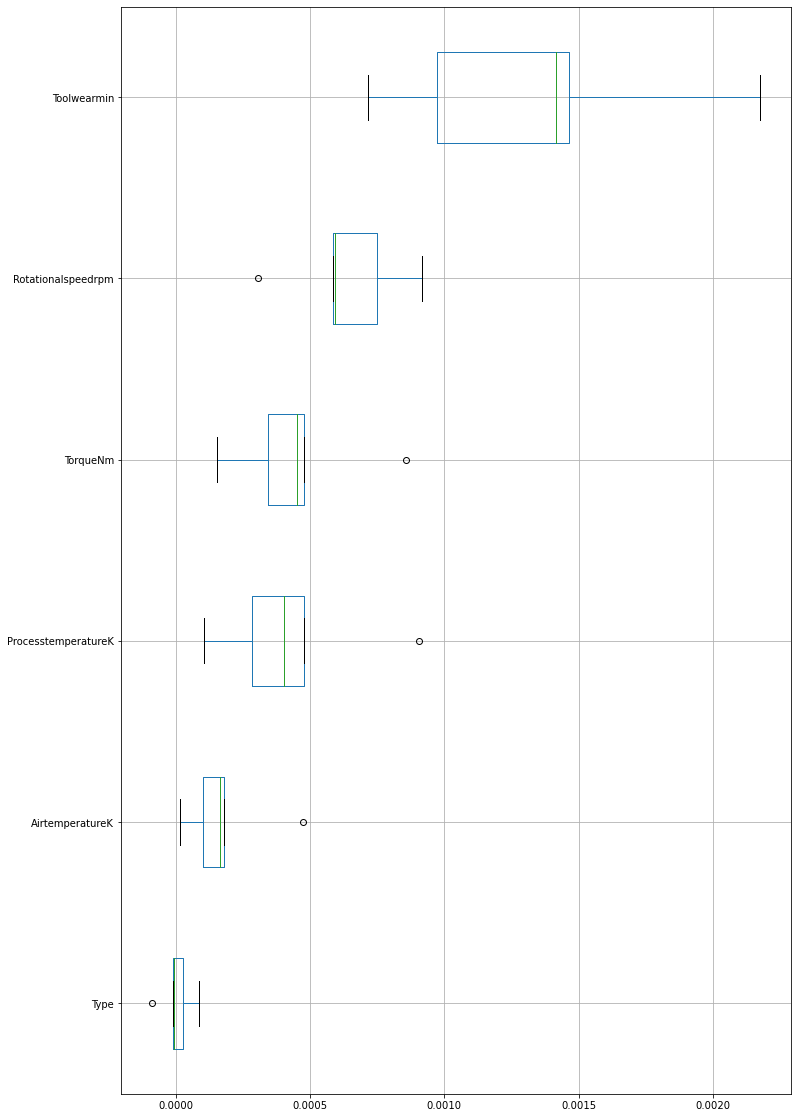

In [137]:
from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset, plot_importance

# define the validation scheme
cv = KFold(n_splits=5, shuffle=True, random_state=0)

# set target
target = "Machine failure"

# define the binary target and the features
dataset = Dataset(df=concat_df, target=target, features=[col for col in concat_df.columns if col != target])

# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="roc_auc" , model=grid_search_lgbmc_clf.best_estimator_)

# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

#Save global feature importance for each model
#importance_df.to_csv('Global_Feat_Import_ML_mdl\\xgb.csv')

# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(12, 20), kind="box")

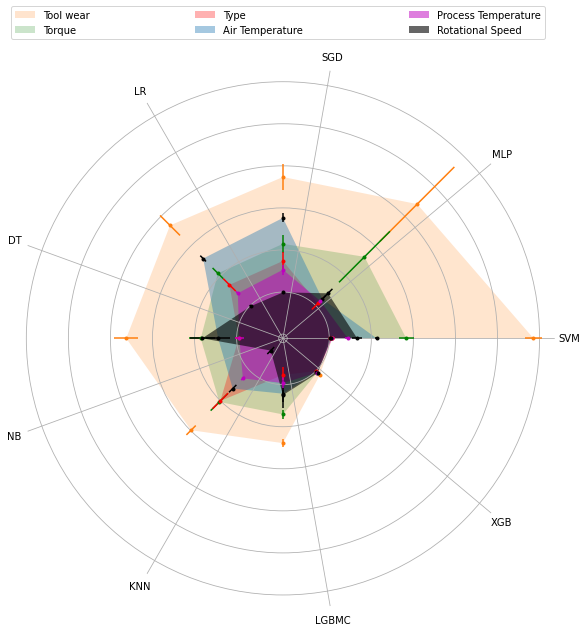

In [138]:
glob_feat_imp_mean_ml=pd.read_csv(r"G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\Global_Feat_Import_ML_mdl\\gl_ft_imp_mn.csv")
glob_feat_imp_std_ml=pd.read_csv(r"G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\Global_Feat_Import_ML_mdl\\glob_feat_imp_std_ml.csv")

model = glob_feat_imp_mean_ml["Model"].tolist()

#Mean error
toolwear_mean_err = glob_feat_imp_mean_ml["Toolwearmin"].tolist()
torque_mean_err = glob_feat_imp_mean_ml["TorqueNm"].tolist()
pr_type_mean_err = glob_feat_imp_mean_ml["Type"].tolist()
airtemperature_mean_err = glob_feat_imp_mean_ml["AirtemperatureK"].tolist()
processtemperature_mean_err = glob_feat_imp_mean_ml["ProcesstemperatureK"].tolist()
rotationalspeedrpm_mean_err = glob_feat_imp_mean_ml["Rotationalspeedrpm"].tolist()

#Standard deviation
toolwear_std = glob_feat_imp_std_ml["Toolwearmin"].tolist()
torque_std = glob_feat_imp_std_ml["TorqueNm"].tolist()
pr_typer_std = glob_feat_imp_std_ml["Type"].tolist()
airtemperaturer_std = glob_feat_imp_std_ml["AirtemperatureK"].tolist()
processtemperaturer_std = glob_feat_imp_std_ml["ProcesstemperatureK"].tolist()
rotationalspeedrpmr_std = glob_feat_imp_std_ml["Rotationalspeedrpm"].tolist()

 
# Initialise the spider plot by setting figure size and polar projection
plt.figure(figsize=(14, 10))
axes =plt.subplot(polar=True)
axes.spines['polar'].set_visible(False)
axes.set_yticklabels([])

theta = np.linspace(0, 2 * np.pi, len(toolwear_mean_err))
 
# Arrange the grid into number of sales equal parts in degrees
lines, labels = plt.thetagrids(range(0, 360, int(360/len(model))), (model))
 
# Plot actual sales graph
#plt.plot(theta, toolwear_mean_err)
plt.errorbar(theta, toolwear_mean_err, yerr=toolwear_std, fmt='.C1')
plt.fill(theta, toolwear_mean_err, 'C1', alpha=0.2)

# Plot expected sales graph
#plt.plot(theta, torque_mean_err)
plt.errorbar(theta, torque_mean_err, yerr=torque_std, fmt='.g')
plt.fill(theta, torque_mean_err, 'g', alpha=0.2)

# Plot expected sales graph
#plt.plot(theta, pr_type_mean_err)
plt.errorbar(theta, pr_type_mean_err, yerr=pr_typer_std, fmt='.r')
plt.fill(theta, pr_type_mean_err, 'r', alpha=0.3)

# Plot expected sales graph
#plt.plot(theta, airtemperature_mean_err)
plt.errorbar(theta, airtemperature_mean_err, yerr=airtemperaturer_std, fmt='.k')
plt.fill(theta, airtemperature_mean_err, 'p', alpha=0.4)

# Plot expected sales graph
#plt.plot(theta, processtemperature_mean_err)
plt.errorbar(theta, processtemperature_mean_err, yerr=processtemperaturer_std, fmt='.m')
plt.fill(theta, processtemperature_mean_err, 'm', alpha=0.5)


# Plot expected sales graph
#plt.plot(theta, rotationalspeedrpm_mean_err)
plt.errorbar(theta, rotationalspeedrpm_mean_err, yerr=rotationalspeedrpmr_std, fmt='.k')
plt.fill(theta, rotationalspeedrpm_mean_err, 'k', alpha=0.6)

# Add legend and title for the plot
plt.legend(labels=('Tool wear', 'Torque', 'Type', 'Air Temperature', 'Process Temperature', 'Rotational Speed'), loc=(0, 1.05), mode='expand',ncol=3)
 
# Dsiplay the plot on the screen
plt.show()

## Global Explainability using Permutation Importance 

In [139]:
!pip install eli5 --user
import eli5
from eli5.sklearn import PermutationImportance
  
# create permutation importance object using model
# and fit on test set
perm = PermutationImportance(rnd_search_XG.best_estimator_, random_state=1).fit(X_test, y_test.values.ravel())
  
# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

## Local Explanations

In [140]:
#Different models:
#fcm: fcm_pred_class_test
#lgbmc_clf: y_test_pred_lgbmc
#ripper_clf: See the model's explanations in RIPPER cells 
#knn: y_test_pred_knn
#dt_clf: y_test_pred_dt
#MLP: y_test_pred_mlp_clf
#svm_clf: y_test_pred_svm
#rnd_search_nb.best_estimator_: y_test_pred_nb
#rnd_search_SGD.best_estimator_: y_test_pred_sgd
#rnd_search_LR.best_estimator_: y_test_pred_log
#rnd_search_XG.best_estimator_:  y_test_pred_xgb

#Find the observations' indexes that the model correctly predicted as faulty
#y: Expected values of the model's output
y=y_test;
true_positive_indexes = []
i=1;

#According to the chosen model
#For example, y_test_pred_lgbmc for LGBM Classifier
for k in range(0,len(y)):
    if (y.loc[k,'Machine failure']==int(y_test_pred_svm[k])) and (y.loc[k,'Machine failure']==1):
        true_positive_indexes.append(k)
        i=i+1;

        
#Find the observations that the selected model correctly predicted as faulty based on the previous indexes
true_positive_observations = pd.DataFrame()
for k in range(0,len(true_positive_indexes)):
    new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y.loc[true_positive_indexes[k],:]], axis=0)
    true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)

    
#Find the observations that the selected model correctly predicted correctly as faulty along with the failure modes

true_positive_observations_with_failure_modes = pd.DataFrame()
#for index1 in range(0,len(true_positive_observations)):
    #for index2 in range (0,len(ai4i2020_encoded_balanced)):
        #if true_positive_observations.loc[index1,:].equals(ai4i2020_encoded_balanced.loc[index2,"Type":"Machine failure"]) == True:
            #print(index1)
            #true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.append(ai4i2020_encoded_balanced.loc[index2,:], ignore_index=True)
true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Machine failure']), ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Machine failure'], how='right')       
final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)

display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

number_of_TWF_failures_in_true_positive_predictions = 0
number_of_HDF_failures_in_true_positive_predictions = 0
number_of_PWF_failures_in_true_positive_predictions = 0
number_of_OSF_failures_in_true_positive_predictions = 0
number_of_random_failures_in_true_positive_predictions=0

for k in range(0,len(final_true_positive_observations_with_failure_modes)):
    if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
        number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
    if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
        number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
    if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
        number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
    if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
        number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
    if (final_true_positive_observations_with_failure_modes.loc[k,"Machine failure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
        number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;

display("Number of TWF failures: " + str(number_of_TWF_failures_in_true_positive_predictions))
display("Number of HDF failures: " + str(number_of_HDF_failures_in_true_positive_predictions))
display("Number of PWF failures: " + str(number_of_PWF_failures_in_true_positive_predictions))
display("Number of OSF failures: " + str(number_of_OSF_failures_in_true_positive_predictions))
display("Number of RNF failures: " + str(number_of_random_failures_in_true_positive_predictions))

'Number of true positive predictions: 902'

'Number of TWF failures: 75'

'Number of HDF failures: 255'

'Number of PWF failures: 135'

'Number of OSF failures: 252'

'Number of RNF failures: 194'

In [141]:
#Interacitve Widget in order to see each true positive observation along with the failure modes

from IPython.display import display
from IPython.display import clear_output
from ipywidgets import Output
from ipywidgets import widgets


text = widgets.Text()
display(text)

out = widgets.Output()
display(out)

def handle_submit(sender):
    with out:
        clear_output()
        index = int(text.value)
        print(final_true_positive_observations_with_failure_modes.loc[index,:])
        print('\n')
        print("Dataset index for the above true positive observation (starting from 0 index): " + str(true_positive_indexes[index]))
        
text.on_submit(handle_submit)



Text(value='')

Output()

* TWF: The tool is replaced or fails after a random **Tool wear**
* HDF: If the **temperature** differential between the **air** and the **process** is less than 8.6 K while at the same time the tool's **rotational speed** is less than 1380 rpm
* PWF: If the product of **torque** and **rotational speed** in rad/sis less than 3500 W or greater than 9000 W
* OSF: The product of **tool wear**, and **torque**

In [142]:
from sklearn.ensemble import RandomForestClassifier
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard.datasets import titanic_survive, titanic_names
from explainerdashboard import InlineExplainer
import shap

#If you want to explore the entire dashboard 
#ExplainerDashboard(ClassifierExplainer(lgbmc_clf.fit(X_train, y_train.values.ravel()), X_test, y_test)).run()

#Different models:
#fcm: fcm_pred_class_test
#lgbmc_clf: grid_search_lgbmc_clf.best_estimator_.fit(X_train, y_train.values.ravel()
#ripper_clf: See the model's explanations in RIPPER cells 
#knn: grid_search_knn.best_estimator_.fit(X_train, y_train.values.ravel())
#dt_clf: grid_search.best_estimator_.fit(X_train,y_train.values.ravel())
#MLP: clf.best_estimator_.fit(X_train, y_train.values.ravel())
#svm_clf: rnd_search_svm.best_estimator_.fit(X_train, y_train.values.ravel())
#rnd_search_nb.best_estimator_: rnd_search_nb.best_estimator_.fit(X_train, y_train.values.ravel()) 
#rnd_search_SGD.best_estimator_: rnd_search_SGD.best_estimator_.fit(X_train, y_train.values.ravel())
#rnd_search_LR.best_estimator_: rnd_search_LR.best_estimator_.fit(X_train, y_train.values.ravel())
#rnd_search_XG.best_estimator_:  rnd_search_XG.best_estimator_.fit(X_train, y_train)


explainer = ClassifierExplainer(rnd_search_svm.best_estimator_.fit(X_train, y_train.values.ravel()), X_test, y_test)
InlineExplainer(explainer).shap.contributions_graph()

Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


In [143]:
# load JS visualization code to notebook
shap.initjs()

#Shap values for each observation in the test dataset
shap_values = explainer.get_shap_values_df(1)

#Calculate the correct explanations
correct_explanations = 0
correct_explanations_TWF = 0
correct_explanations_HDF = 0
correct_explanations_PWF = 0
correct_explanations_OSF = 0

for k in range(0,len(true_positive_observations)):
    #if the failure mode is TWF
    if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
        #if tool wear is the most important feature
        if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
            correct_explanations = correct_explanations+1;
            correct_explanations_TWF = correct_explanations_TWF + 1;
    
    #if the failure mode is HDF
    if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
        maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
        maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
        if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
            correct_explanations = correct_explanations+1;
            correct_explanations_HDF = correct_explanations_HDF + 1;
            
    #if the failure mode is PWF
    if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
        maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
        maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
        if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
            correct_explanations = correct_explanations+1;
            correct_explanations_PWF = correct_explanations_PWF + 1;
            
    #if the failure mode is OSF        
    if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
        maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
        maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
        if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
            correct_explanations = correct_explanations+1;
            correct_explanations_OSF = correct_explanations_OSF + 1;

print("TWF: %.4f success, HDF: %.4f success, PWF: %.4f success, OSF: %.4f success \n\n" % (correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions,correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions,correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions,correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions))

average_success = ((correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)+(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)+(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)+(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions))/4

print("Through the model, %d correct explanations are made in the true positive predictions with average success: %.4f \n\n" % (correct_explanations, average_success))


Calculating shap values...


  0%|          | 0/1751 [00:00<?, ?it/s]

TWF: 1.0000 success, HDF: 0.8588 success, PWF: 1.0000 success, OSF: 1.0000 success 


Through the model, 681 correct explanations are made in the true positive predictions with average success: 0.9647 




## Calculate the evaluation metrics for all folds of the best estimators  

## LightGBM

In [144]:
acc_folds_best_estimator_lgmbc = []
auc_folds_best_estimator_lgmbc = []
kappa_folds_best_estimator_lgmbc = []
twf_folds_best_estimator_lgmbc = []
hdf_folds_best_estimator_lgmbc = []
pwf_folds_best_estimator_lgmbc = []
osf_folds_best_estimator_lgmbc = []
av_folds_best_estimator_lgmbc = []
fold_list_lgmbc = []


for fold in range(1,11):
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    
    #Build the Classifier
    
    grid_search_lgbmc_clf.best_estimator_.fit(X_train, y_train.values.ravel())
    
    #Predictions for the test set
    y_test_pred_lgbmc = grid_search_lgbmc_clf.best_estimator_.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_lgbmc = accuracy_score(y_test, y_test_pred_lgbmc)
    cohen_score_lgbmc = cohen_kappa_score(y_test, y_test_pred_lgbmc)
    auc_lgbmc = metrics.roc_auc_score(y_test, y_test_pred_lgbmc)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_lgbmc[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_lgmbc.append(accuracy_lgbmc)
        kappa_folds_best_estimator_lgmbc.append(cohen_score_lgbmc)
        auc_folds_best_estimator_lgmbc.append(auc_lgbmc)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;
        
        #Local Explanations
        explainer = ClassifierExplainer(grid_search_lgbmc_clf.best_estimator_.fit(X_train, y_train.values.ravel()), X_test, y_test)
        
        # load JS visualization code to notebook
        shap.initjs()

        #Shap values for each observation in the test dataset
        shap_values = explainer.get_shap_values_df(1)
          
        #Calculate the correct explanations
        correct_explanations = 0
        correct_explanations_TWF = 0
        correct_explanations_HDF = 0
        correct_explanations_PWF = 0
        correct_explanations_OSF = 0

        for k in range(0,len(true_positive_observations)):
            #if the failure mode is TWF
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
                #if tool wear is the most important feature
                if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_TWF = correct_explanations_TWF + 1;
                
            #if the failure mode is HDF
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_HDF = correct_explanations_HDF + 1;
            
            
            #if the failure mode is PWF
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_PWF = correct_explanations_PWF + 1;
            
            #if the failure mode is OSF        
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_OSF = correct_explanations_OSF + 1;
        
        denominator = 0
        
        if number_of_TWF_failures_in_true_positive_predictions != 0:
            twf_folds_best_estimator_lgmbc.append(correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)
            twf_success = correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            twf_folds_best_estimator_lgmbc.append(correct_explanations_TWF)
            twf_success = 0
        if number_of_HDF_failures_in_true_positive_predictions != 0:
            hdf_folds_best_estimator_lgmbc.append(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)
            hdf_success = correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            hdf_folds_best_estimator_lgmbc.append(correct_explanations_HDF)
            hdf_success = 0
        if number_of_PWF_failures_in_true_positive_predictions != 0:
            pwf_folds_best_estimator_lgmbc.append(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)
            pwf_success = correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            pwf_folds_best_estimator_lgmbc.append(correct_explanations_PWF)
            pwf_success = 0
        if number_of_OSF_failures_in_true_positive_predictions != 0:
            osf_folds_best_estimator_lgmbc.append(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions)
            osf_success = correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            osf_folds_best_estimator_lgmbc.append(correct_explanations_OSF)
            osf_success = 0
    
        average_success = (twf_success+hdf_success+pwf_success+osf_success)/denominator
        av_folds_best_estimator_lgmbc.append(average_success)
        fold_list_lgmbc.append(fold)

result_df_best_estimator_lgmbc = pd.DataFrame({'Accuracy': acc_folds_best_estimator_lgmbc, 'AUC': auc_folds_best_estimator_lgmbc, 'Kappa':kappa_folds_best_estimator_lgmbc, 'TWF':twf_folds_best_estimator_lgmbc, 'HDF':hdf_folds_best_estimator_lgmbc, 'PWF':pwf_folds_best_estimator_lgmbc, 'OSF':osf_folds_best_estimator_lgmbc, 'Average Success':av_folds_best_estimator_lgmbc, 'Folds':fold_list_lgmbc})


Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...


Calculating shap values...


 93%|=================== | 1620/1751 [00:11<00:00]       

Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...


Calculating shap values...


 94%|=================== | 1651/1751 [00:13<00:00]       

Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...


Calculating shap values...


 93%|=================== | 1624/1751 [00:11<00:00]       

Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...


Calculating shap values...


 97%|=================== | 1703/1751 [00:14<00:00]       

Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...


Calculating shap values...


 96%|=================== | 1674/1751 [00:13<00:00]       

Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...


Calculating shap values...


 97%|=================== | 1695/1751 [00:11<00:00]       

Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...


Calculating shap values...


 93%|=================== | 1623/1751 [00:13<00:01]       

Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...


Calculating shap values...


 95%|=================== | 1662/1750 [00:11<00:00]       

Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...


Calculating shap values...


 95%|=================== | 1663/1750 [00:11<00:00]       

Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...


Calculating shap values...


 95%|=================== | 1670/1750 [00:14<00:00]       

In [145]:
result_df_best_estimator_lgmbc

Accuracy       AUC     Kappa       TWF       HDF  PWF  OSF  \
0  0.993147  0.992973  0.986260  1.000000  0.858824  1.0  1.0   
1  0.993718  0.993572  0.987405  0.973684  0.886179  1.0  1.0   
2  0.996002  0.995914  0.991986  0.986486  0.876033  1.0  1.0   
3  0.993147  0.992867  0.986257  1.000000  0.877193  1.0  1.0   
4  0.994860  0.994717  0.989695  1.000000  0.844262  1.0  1.0   
5  0.997144  0.997059  0.994276  1.000000  0.921053  1.0  1.0   
6  0.992005  0.991723  0.983966  1.000000  0.961864  1.0  1.0   
7  0.994286  0.994012  0.988541  1.000000  0.967213  1.0  1.0   
8  0.994857  0.994658  0.989688  1.000000  0.945607  1.0  1.0   
9  0.997143  0.997002  0.994272  1.000000  0.906383  1.0  1.0   

   Average Success  Folds  
0         0.964706      1  
1         0.964966      2  
2         0.965630      3  
3         0.969298      4  
4         0.961066      5  
5         0.980263      6  
6         0.990466      7  
7         0.991803      8  
8         0.986402      9  
9         0.976596     10

## K-Nearest Neighbour (KNN) 

In [ ]:
acc_folds_best_estimator_knn = []
auc_folds_best_estimator_knn = []
kappa_folds_best_estimator_knn = []
twf_folds_best_estimator_knn = []
hdf_folds_best_estimator_knn = []
pwf_folds_best_estimator_knn = []
osf_folds_best_estimator_knn = []
av_folds_best_estimator_knn = []
fold_list_knn = []


for fold in range(1,11):
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    
    #Build the Classifier
    
    grid_search_knn.best_estimator_.fit(X_train, y_train.values.ravel())
    
    #Predictions for the test set
    y_test_pred_knn = grid_search_knn.best_estimator_.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
    cohen_score_knn = cohen_kappa_score(y_test, y_test_pred_knn)
    auc_knn = metrics.roc_auc_score(y_test, y_test_pred_knn)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_knn[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_knn.append(accuracy_knn)
        kappa_folds_best_estimator_knn.append(cohen_score_knn)
        auc_folds_best_estimator_knn.append(auc_knn)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;
        
        #Local Explanations
        explainer = ClassifierExplainer(grid_search_knn.best_estimator_.fit(X_train, y_train.values.ravel()), X_test, y_test)
        
        # load JS visualization code to notebook
        shap.initjs()

        #Shap values for each observation in the test dataset
        shap_values = explainer.get_shap_values_df(1)
          
        #Calculate the correct explanations
        correct_explanations = 0
        correct_explanations_TWF = 0
        correct_explanations_HDF = 0
        correct_explanations_PWF = 0
        correct_explanations_OSF = 0

        for k in range(0,len(true_positive_observations)):
            #if the failure mode is TWF
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
                #if tool wear is the most important feature
                if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_TWF = correct_explanations_TWF + 1;
                
            #if the failure mode is HDF
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_HDF = correct_explanations_HDF + 1;
            
            
            #if the failure mode is PWF
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_PWF = correct_explanations_PWF + 1;
            
            #if the failure mode is OSF        
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_OSF = correct_explanations_OSF + 1;
        
        denominator = 0
        
        if number_of_TWF_failures_in_true_positive_predictions != 0:
            twf_folds_best_estimator_knn.append(correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)
            twf_success = correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            twf_folds_best_estimator_knn.append(correct_explanations_TWF)
            twf_success = 0
        if number_of_HDF_failures_in_true_positive_predictions != 0:
            hdf_folds_best_estimator_knn.append(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)
            hdf_success = correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            hdf_folds_best_estimator_knn.append(correct_explanations_HDF)
            hdf_success = 0
        if number_of_PWF_failures_in_true_positive_predictions != 0:
            pwf_folds_best_estimator_knn.append(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)
            pwf_success = correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            pwf_folds_best_estimator_knn.append(correct_explanations_PWF)
            pwf_success = 0
        if number_of_OSF_failures_in_true_positive_predictions != 0:
            osf_folds_best_estimator_knn.append(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions)
            osf_success = correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            osf_folds_best_estimator_knn.append(correct_explanations_OSF)
            osf_success = 0
    
        average_success = (twf_success+hdf_success+pwf_success+osf_success)/denominator
        av_folds_best_estimator_knn.append(average_success)
        fold_list_knn.append(fold)

result_df_best_estimator_knn = pd.DataFrame({'Accuracy': acc_folds_best_estimator_knn, 'AUC': auc_folds_best_estimator_knn, 'Kappa':kappa_folds_best_estimator_knn, 'TWF':twf_folds_best_estimator_knn, 'HDF':hdf_folds_best_estimator_knn, 'PWF':pwf_folds_best_estimator_knn, 'OSF':osf_folds_best_estimator_knn, 'Average Success':av_folds_best_estimator_knn, 'Folds':fold_list_knn})


Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


Calculating shap values...


  0%|          | 0/1751 [00:00<?, ?it/s]

In [ ]:
result_df_best_estimator_knn

## Decision Tree 

In [ ]:
acc_folds_best_estimator_dt = []
auc_folds_best_estimator_dt = []
kappa_folds_best_estimator_dt = []
twf_folds_best_estimator_dt = []
hdf_folds_best_estimator_dt = []
pwf_folds_best_estimator_dt = []
osf_folds_best_estimator_dt = []
av_folds_best_estimator_dt = []
fold_list_dt = []


for fold in range(1,11):
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    
    #Build the Classifier
    
    grid_search.best_estimator_.fit(X_train, y_train.values.ravel())
    
    #Predictions for the test set
    y_test_pred_dt = grid_search.best_estimator_.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_knn = accuracy_score(y_test, y_test_pred_dt)
    cohen_score_knn = cohen_kappa_score(y_test, y_test_pred_dt)
    auc_knn = metrics.roc_auc_score(y_test, y_test_pred_dt)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_dt[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_knn.append(accuracy_dt)
        kappa_folds_best_estimator_knn.append(cohen_score_dt)
        auc_folds_best_estimator_knn.append(auc_dt)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;
        
        #Local Explanations
        explainer = ClassifierExplainer(grid_search.best_estimator_.fit(X_train, y_train.values.ravel()), X_test, y_test)
        
        # load JS visualization code to notebook
        shap.initjs()

        #Shap values for each observation in the test dataset
        shap_values = explainer.get_shap_values_df(1)
          
        #Calculate the correct explanations
        correct_explanations = 0
        correct_explanations_TWF = 0
        correct_explanations_HDF = 0
        correct_explanations_PWF = 0
        correct_explanations_OSF = 0

        for k in range(0,len(true_positive_observations)):
            #if the failure mode is TWF
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
                #if tool wear is the most important feature
                if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_TWF = correct_explanations_TWF + 1;
                
            #if the failure mode is HDF
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_HDF = correct_explanations_HDF + 1;
            
            
            #if the failure mode is PWF
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_PWF = correct_explanations_PWF + 1;
            
            #if the failure mode is OSF        
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_OSF = correct_explanations_OSF + 1;
        
        denominator = 0
        
        if number_of_TWF_failures_in_true_positive_predictions != 0:
            twf_folds_best_estimator_dt.append(correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)
            twf_success = correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            twf_folds_best_estimator_dt.append(correct_explanations_TWF)
            twf_success = 0
        if number_of_HDF_failures_in_true_positive_predictions != 0:
            hdf_folds_best_estimator_dt.append(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)
            hdf_success = correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            hdf_folds_best_estimator_dt.append(correct_explanations_HDF)
            hdf_success = 0
        if number_of_PWF_failures_in_true_positive_predictions != 0:
            pwf_folds_best_estimator_dt.append(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)
            pwf_success = correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            pwf_folds_best_estimator_dt.append(correct_explanations_PWF)
            pwf_success = 0
        if number_of_OSF_failures_in_true_positive_predictions != 0:
            osf_folds_best_estimator_dt.append(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions)
            osf_success = correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            osf_folds_best_estimator_dt.append(correct_explanations_OSF)
            osf_success = 0
    
        average_success = (twf_success+hdf_success+pwf_success+osf_success)/denominator
        av_folds_best_estimator_dt.append(average_success)
        fold_list_dt.append(fold)

result_df_best_estimator_dt = pd.DataFrame({'Accuracy': acc_folds_best_estimator_dt, 'AUC': auc_folds_best_estimator_dt, 'Kappa':kappa_folds_best_estimator_dt, 'TWF':twf_folds_best_estimator_dt, 'HDF':hdf_folds_best_estimator_dt, 'PWF':pwf_folds_best_estimator_dt, 'OSF':osf_folds_best_estimator_dt, 'Average Success':av_folds_best_estimator_dt, 'Folds':fold_list_dt})


In [ ]:
result_df_best_estimator_dt

## MLPClassifier 

In [ ]:
acc_folds_best_estimator_mlp = []
auc_folds_best_estimator_mlp = []
kappa_folds_best_estimator_mlp = []
twf_folds_best_estimator_mlp = []
hdf_folds_best_estimator_mlp = []
pwf_folds_best_estimator_mlp = []
osf_folds_best_estimator_mlp = []
av_folds_best_estimator_mlp = []
fold_list_mlp = []


for fold in range(1,11):
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    
    #Build the Classifier
    
    clf.best_estimator_.fit(X_train, y_train.values.ravel())
    
    #Predictions for the test set
    y_test_pred_mlp_clf = clf.best_estimator_.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_mlp = accuracy_score(y_test, y_test_pred_mlp_clf)
    cohen_score_mlp = cohen_kappa_score(y_test, y_test_pred_mlp_clf)
    auc_mlp = metrics.roc_auc_score(y_test, y_test_pred_mlp_clf)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_mlp_clf[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_mlp.append(accuracy_mlp)
        kappa_folds_best_estimator_mlp.append(cohen_score_mlp)
        auc_folds_best_estimator_mlp.append(auc_mlp)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;
        
        #Local Explanations
        explainer = ClassifierExplainer(clf.best_estimator_.fit(X_train, y_train.values.ravel()), X_test, y_test)
        
        # load JS visualization code to notebook
        shap.initjs()

        #Shap values for each observation in the test dataset
        shap_values = explainer.get_shap_values_df(1)
          
        #Calculate the correct explanations
        correct_explanations = 0
        correct_explanations_TWF = 0
        correct_explanations_HDF = 0
        correct_explanations_PWF = 0
        correct_explanations_OSF = 0

        for k in range(0,len(true_positive_observations)):
            #if the failure mode is TWF
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
                #if tool wear is the most important feature
                if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_TWF = correct_explanations_TWF + 1;
                
            #if the failure mode is HDF
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_HDF = correct_explanations_HDF + 1;
            
            
            #if the failure mode is PWF
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_PWF = correct_explanations_PWF + 1;
            
            #if the failure mode is OSF        
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_OSF = correct_explanations_OSF + 1;
        
        denominator = 0
        
        if number_of_TWF_failures_in_true_positive_predictions != 0:
            twf_folds_best_estimator_mlp.append(correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)
            twf_success = correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            twf_folds_best_estimator_mlp.append(correct_explanations_TWF)
            twf_success = 0
        if number_of_HDF_failures_in_true_positive_predictions != 0:
            hdf_folds_best_estimator_mlp.append(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)
            hdf_success = correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            hdf_folds_best_estimator_mlp.append(correct_explanations_HDF)
            hdf_success = 0
        if number_of_PWF_failures_in_true_positive_predictions != 0:
            pwf_folds_best_estimator_mlp.append(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)
            pwf_success = correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            pwf_folds_best_estimator_mlp.append(correct_explanations_PWF)
            pwf_success = 0
        if number_of_OSF_failures_in_true_positive_predictions != 0:
            osf_folds_best_estimator_mlp.append(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions)
            osf_success = correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            osf_folds_best_estimator_mlp.append(correct_explanations_OSF)
            osf_success = 0
    
        average_success = (twf_success+hdf_success+pwf_success+osf_success)/denominator
        av_folds_best_estimator_mlp.append(average_success)
        fold_list_mlp.append(fold)

result_df_best_estimator_mlp = pd.DataFrame({'Accuracy': acc_folds_best_estimator_mlp, 'AUC': auc_folds_best_estimator_mlp, 'Kappa':kappa_folds_best_estimator_mlp, 'TWF':twf_folds_best_estimator_mlp, 'HDF':hdf_folds_best_estimator_mlp, 'PWF':pwf_folds_best_estimator_mlp, 'OSF':osf_folds_best_estimator_mlp, 'Average Success':av_folds_best_estimator_mlp, 'Folds':fold_list_mlp})


In [ ]:
result_df_best_estimator_mlp

## Support Vector Machine

In [ ]:
acc_folds_best_estimator_svm = []
auc_folds_best_estimator_svm = []
kappa_folds_best_estimator_svm = []
twf_folds_best_estimator_svm = []
hdf_folds_best_estimator_svm = []
pwf_folds_best_estimator_svm = []
osf_folds_best_estimator_svm = []
av_folds_best_estimator_svm = []
fold_list_svm = []


for fold in range(1,11):
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    
    #Build the Classifier
    
    rnd_search_svm.best_estimator_.fit(X_train, y_train.values.ravel())
    
    #Predictions for the test set
    y_test_pred_svm = rnd_search_svm.best_estimator_.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
    cohen_score_svm = cohen_kappa_score(y_test, y_test_pred_svm)
    auc_svm = metrics.roc_auc_score(y_test, y_test_pred_svm)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_svm[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_svm.append(accuracy_svm)
        kappa_folds_best_estimator_svm.append(cohen_score_svm)
        auc_folds_best_estimator_svm.append(auc_svm)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;
        
        #Local Explanations
        explainer = ClassifierExplainer(rnd_search_svm.best_estimator_.fit(X_train, y_train.values.ravel()), X_test, y_test)
        
        # load JS visualization code to notebook
        shap.initjs()

        #Shap values for each observation in the test dataset
        shap_values = explainer.get_shap_values_df(1)
          
        #Calculate the correct explanations
        correct_explanations = 0
        correct_explanations_TWF = 0
        correct_explanations_HDF = 0
        correct_explanations_PWF = 0
        correct_explanations_OSF = 0

        for k in range(0,len(true_positive_observations)):
            #if the failure mode is TWF
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
                #if tool wear is the most important feature
                if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_TWF = correct_explanations_TWF + 1;
                
            #if the failure mode is HDF
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_HDF = correct_explanations_HDF + 1;
            
            
            #if the failure mode is PWF
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_PWF = correct_explanations_PWF + 1;
            
            #if the failure mode is OSF        
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_OSF = correct_explanations_OSF + 1;
        
        denominator = 0
        
        if number_of_TWF_failures_in_true_positive_predictions != 0:
            twf_folds_best_estimator_svm.append(correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)
            twf_success = correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            twf_folds_best_estimator_svm.append(correct_explanations_TWF)
            twf_success = 0
        if number_of_HDF_failures_in_true_positive_predictions != 0:
            hdf_folds_best_estimator_svm.append(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)
            hdf_success = correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            hdf_folds_best_estimator_svm.append(correct_explanations_HDF)
            hdf_success = 0
        if number_of_PWF_failures_in_true_positive_predictions != 0:
            pwf_folds_best_estimator_svm.append(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)
            pwf_success = correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            pwf_folds_best_estimator_svm.append(correct_explanations_PWF)
            pwf_success = 0
        if number_of_OSF_failures_in_true_positive_predictions != 0:
            osf_folds_best_estimator_svm.append(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions)
            osf_success = correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            osf_folds_best_estimator_svm.append(correct_explanations_OSF)
            osf_success = 0
    
        average_success = (twf_success+hdf_success+pwf_success+osf_success)/denominator
        av_folds_best_estimator_svm.append(average_success)
        fold_list_svm.append(fold)

result_df_best_estimator_svm = pd.DataFrame({'Accuracy': acc_folds_best_estimator_svm, 'AUC': auc_folds_best_estimator_svm, 'Kappa':kappa_folds_best_estimator_svm, 'TWF':twf_folds_best_estimator_svm, 'HDF':hdf_folds_best_estimator_svm, 'PWF':pwf_folds_best_estimator_svm, 'OSF':osf_folds_best_estimator_svm, 'Average Success':av_folds_best_estimator_svm, 'Folds':fold_list_svm})


In [ ]:
result_df_best_estimator_svm

## Gaussian Naive Bayes Classifier 

In [ ]:
acc_folds_best_estimator_nb = []
auc_folds_best_estimator_nb = []
kappa_folds_best_estimator_nb = []
twf_folds_best_estimator_nb = []
hdf_folds_best_estimator_nb = []
pwf_folds_best_estimator_nb = []
osf_folds_best_estimator_nb = []
av_folds_best_estimator_nb = []
fold_list_nb = []


for fold in range(1,11):
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    
    #Build the Classifier
    
    rnd_search_nb.best_estimator_.fit(X_train, y_train.values.ravel())
    
    #Predictions for the test set
    y_test_pred_nb = rnd_search_nb.best_estimator_.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
    cohen_score_nb = cohen_kappa_score(y_test, y_test_pred_nb)
    auc_nb = metrics.roc_auc_score(y_test, y_test_pred_nb)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_nb[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_nb.append(accuracy_nb)
        kappa_folds_best_estimator_nb.append(cohen_score_nb)
        auc_folds_best_estimator_nb.append(auc_nb)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;
        
        #Local Explanations
        explainer = ClassifierExplainer(rnd_search_nb.best_estimator_.fit(X_train, y_train.values.ravel()), X_test, y_test)
        
        # load JS visualization code to notebook
        shap.initjs()

        #Shap values for each observation in the test dataset
        shap_values = explainer.get_shap_values_df(1)
          
        #Calculate the correct explanations
        correct_explanations = 0
        correct_explanations_TWF = 0
        correct_explanations_HDF = 0
        correct_explanations_PWF = 0
        correct_explanations_OSF = 0

        for k in range(0,len(true_positive_observations)):
            #if the failure mode is TWF
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
                #if tool wear is the most important feature
                if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_TWF = correct_explanations_TWF + 1;
                
            #if the failure mode is HDF
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_HDF = correct_explanations_HDF + 1;
            
            
            #if the failure mode is PWF
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_PWF = correct_explanations_PWF + 1;
            
            #if the failure mode is OSF        
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_OSF = correct_explanations_OSF + 1;
        
        denominator = 0
        
        if number_of_TWF_failures_in_true_positive_predictions != 0:
            twf_folds_best_estimator_nb.append(correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)
            twf_success = correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            twf_folds_best_estimator_nb.append(correct_explanations_TWF)
            twf_success = 0
        if number_of_HDF_failures_in_true_positive_predictions != 0:
            hdf_folds_best_estimator_nb.append(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)
            hdf_success = correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            hdf_folds_best_estimator_nb.append(correct_explanations_HDF)
            hdf_success = 0
        if number_of_PWF_failures_in_true_positive_predictions != 0:
            pwf_folds_best_estimator_nb.append(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)
            pwf_success = correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            pwf_folds_best_estimator_nb.append(correct_explanations_PWF)
            pwf_success = 0
        if number_of_OSF_failures_in_true_positive_predictions != 0:
            osf_folds_best_estimator_nb.append(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions)
            osf_success = correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            osf_folds_best_estimator_nb.append(correct_explanations_OSF)
            osf_success = 0
    
        average_success = (twf_success+hdf_success+pwf_success+osf_success)/denominator
        av_folds_best_estimator_nb.append(average_success)
        fold_list_nb.append(fold)

result_df_best_estimator_nb = pd.DataFrame({'Accuracy': acc_folds_best_estimator_nb, 'AUC': auc_folds_best_estimator_nb, 'Kappa':kappa_folds_best_estimator_nb, 'TWF':twf_folds_best_estimator_nb, 'HDF':hdf_folds_best_estimator_nb, 'PWF':pwf_folds_best_estimator_nb, 'OSF':osf_folds_best_estimator_nb, 'Average Success':av_folds_best_estimator_nb, 'Folds':fold_list_nb})


In [ ]:
result_df_best_estimator_nb

## Stochastic Gradient Descent 

In [ ]:
acc_folds_best_estimator_lr = []
auc_folds_best_estimator_lr = []
kappa_folds_best_estimator_lr = []
twf_folds_best_estimator_lr = []
hdf_folds_best_estimator_lr = []
pwf_folds_best_estimator_lr = []
osf_folds_best_estimator_lr = []
av_folds_best_estimator_lr = []
fold_list_lr = []


for fold in range(1,11):
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    
    #Build the Classifier
    
    rnd_search_SGD.best_estimator_.fit(X_train, y_train.values.ravel())
    
    #Predictions for the test set
    y_test_pred_sgd = rnd_search_SGD.best_estimator_.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_sgd = accuracy_score(y_test, y_test_pred_sgd)
    cohen_score_sgd = cohen_kappa_score(y_test, y_test_pred_sgd)
    auc_sgd = metrics.roc_auc_score(y_test, y_test_pred_sgd)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_sgd[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_sgd.append(accuracy_sgd)
        kappa_folds_best_estimator_sgd.append(cohen_score_sgd)
        auc_folds_best_estimator_sgd.append(auc_sgd)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;
        
        #Local Explanations
        explainer = ClassifierExplainer(rnd_search_SGD.best_estimator_.fit(X_train, y_train.values.ravel()), X_test, y_test)
        
        # load JS visualization code to notebook
        shap.initjs()

        #Shap values for each observation in the test dataset
        shap_values = explainer.get_shap_values_df(1)
          
        #Calculate the correct explanations
        correct_explanations = 0
        correct_explanations_TWF = 0
        correct_explanations_HDF = 0
        correct_explanations_PWF = 0
        correct_explanations_OSF = 0

        for k in range(0,len(true_positive_observations)):
            #if the failure mode is TWF
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
                #if tool wear is the most important feature
                if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_TWF = correct_explanations_TWF + 1;
                
            #if the failure mode is HDF
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_HDF = correct_explanations_HDF + 1;
            
            
            #if the failure mode is PWF
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_PWF = correct_explanations_PWF + 1;
            
            #if the failure mode is OSF        
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_OSF = correct_explanations_OSF + 1;
        
        denominator = 0
        
        if number_of_TWF_failures_in_true_positive_predictions != 0:
            twf_folds_best_estimator_sgd.append(correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)
            twf_success = correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            twf_folds_best_estimator_sgd.append(correct_explanations_TWF)
            twf_success = 0
        if number_of_HDF_failures_in_true_positive_predictions != 0:
            hdf_folds_best_estimator_sgd.append(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)
            hdf_success = correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            hdf_folds_best_estimator_sgd.append(correct_explanations_HDF)
            hdf_success = 0
        if number_of_PWF_failures_in_true_positive_predictions != 0:
            pwf_folds_best_estimator_sgd.append(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)
            pwf_success = correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            pwf_folds_best_estimator_sgd.append(correct_explanations_PWF)
            pwf_success = 0
        if number_of_OSF_failures_in_true_positive_predictions != 0:
            osf_folds_best_estimator_sgd.append(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions)
            osf_success = correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            osf_folds_best_estimator_sgd.append(correct_explanations_OSF)
            osf_success = 0
    
        average_success = (twf_success+hdf_success+pwf_success+osf_success)/denominator
        av_folds_best_estimator_sgd.append(average_success)
        fold_list_sgd.append(fold)

result_df_best_estimator_sgd = pd.DataFrame({'Accuracy': acc_folds_best_estimator_sgd, 'AUC': auc_folds_best_estimator_sgd, 'Kappa':kappa_folds_best_estimator_sgd, 'TWF':twf_folds_best_estimator_sgd, 'HDF':hdf_folds_best_estimator_sgd, 'PWF':pwf_folds_best_estimator_sgd, 'OSF':osf_folds_best_estimator_sgd, 'Average Success':av_folds_best_estimator_sgd, 'Folds':fold_list_sgd})


In [ ]:
result_df_best_estimator_sgd

## Logistic Regression

In [ ]:
acc_folds_best_estimator_log = []
auc_folds_best_estimator_log = []
kappa_folds_best_estimator_log = []
twf_folds_best_estimator_log = []
hdf_folds_best_estimator_log = []
pwf_folds_best_estimator_log = []
osf_folds_best_estimator_log = []
av_folds_best_estimator_log = []
fold_list_log = []


for fold in range(1,11):
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    
    #Build the Classifier
    
    rnd_search_LR.best_estimator_.fit(X_train, y_train.values.ravel())
    
    #Predictions for the test set
    y_test_pred_log = rnd_search_LR.best_estimator_.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_log = accuracy_score(y_test, y_test_pred_log)
    cohen_score_log = cohen_kappa_score(y_test, y_test_pred_log)
    auc_log = metrics.roc_auc_score(y_test, y_test_pred_log)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_log[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_log.append(accuracy_log)
        kappa_folds_best_estimator_log.append(cohen_score_log)
        auc_folds_best_estimator_log.append(auc_log)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;
        
        #Local Explanations
        explainer = ClassifierExplainer(rnd_search_LR.best_estimator_.fit(X_train, y_train.values.ravel()), X_test, y_test)
        
        # load JS visualization code to notebook
        shap.initjs()

        #Shap values for each observation in the test dataset
        shap_values = explainer.get_shap_values_df(1)
          
        #Calculate the correct explanations
        correct_explanations = 0
        correct_explanations_TWF = 0
        correct_explanations_HDF = 0
        correct_explanations_PWF = 0
        correct_explanations_OSF = 0

        for k in range(0,len(true_positive_observations)):
            #if the failure mode is TWF
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
                #if tool wear is the most important feature
                if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_TWF = correct_explanations_TWF + 1;
                
            #if the failure mode is HDF
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_HDF = correct_explanations_HDF + 1;
            
            
            #if the failure mode is PWF
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_PWF = correct_explanations_PWF + 1;
            
            #if the failure mode is OSF        
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_OSF = correct_explanations_OSF + 1;
        
        denominator = 0
        
        if number_of_TWF_failures_in_true_positive_predictions != 0:
            twf_folds_best_estimator_log.append(correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)
            twf_success = correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            twf_folds_best_estimator_log.append(correct_explanations_TWF)
            twf_success = 0
        if number_of_HDF_failures_in_true_positive_predictions != 0:
            hdf_folds_best_estimator_log.append(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)
            hdf_success = correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            hdf_folds_best_estimator_log.append(correct_explanations_HDF)
            hdf_success = 0
        if number_of_PWF_failures_in_true_positive_predictions != 0:
            pwf_folds_best_estimator_log.append(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)
            pwf_success = correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            pwf_folds_best_estimator_log.append(correct_explanations_PWF)
            pwf_success = 0
        if number_of_OSF_failures_in_true_positive_predictions != 0:
            osf_folds_best_estimator_log.append(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions)
            osf_success = correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            osf_folds_best_estimator_log.append(correct_explanations_OSF)
            osf_success = 0
    
        average_success = (twf_success+hdf_success+pwf_success+osf_success)/denominator
        av_folds_best_estimator_log.append(average_success)
        fold_list_log.append(fold)

result_df_best_estimator_log = pd.DataFrame({'Accuracy': acc_folds_best_estimator_log, 'AUC': auc_folds_best_estimator_log, 'Kappa':kappa_folds_best_estimator_log, 'TWF':twf_folds_best_estimator_log, 'HDF':hdf_folds_best_estimator_log, 'PWF':pwf_folds_best_estimator_log, 'OSF':osf_folds_best_estimator_log, 'Average Success':av_folds_best_estimator_log, 'Folds':fold_list_log})


In [ ]:
result_df_best_estimator_log

## XGBOOST 

In [ ]:
acc_folds_best_estimator_xgb = []
auc_folds_best_estimator_xgb = []
kappa_folds_best_estimator_xgb = []
twf_folds_best_estimator_xgb = []
hdf_folds_best_estimator_xgb = []
pwf_folds_best_estimator_xgb = []
osf_folds_best_estimator_xgb = []
av_folds_best_estimator_xgb = []
fold_list_xgb = []


for fold in range(1,11):
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    regex = re.compile(r"\[|\]|<", re.IGNORECASE)
    X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
    X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]
    
    #Build the Classifier
    
    rnd_search_XG.best_estimator_.fit(X_train, y_train.values.ravel())
    
    #Predictions for the test set
    y_test_pred_xgb = rnd_search_LR.best_estimator_.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
    cohen_score_xgb = cohen_kappa_score(y_test, y_test_pred_xgb)
    auc_xgb = metrics.roc_auc_score(y_test, y_test_pred_xgb)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_xgb[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_xgb.append(accuracy_xgb)
        kappa_folds_best_estimator_xgb.append(cohen_score_xgb)
        auc_folds_best_estimator_xgb.append(auc_xgb)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;
        
        #Local Explanations
        explainer = ClassifierExplainer(rnd_search_LR.best_estimator_.fit(X_train, y_train.values.ravel()), X_test, y_test)
        
        # load JS visualization code to notebook
        shap.initjs()

        #Shap values for each observation in the test dataset
        shap_values = explainer.get_shap_values_df(1)
          
        #Calculate the correct explanations
        correct_explanations = 0
        correct_explanations_TWF = 0
        correct_explanations_HDF = 0
        correct_explanations_PWF = 0
        correct_explanations_OSF = 0

        for k in range(0,len(true_positive_observations)):
            #if the failure mode is TWF
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
                #if tool wear is the most important feature
                if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_TWF = correct_explanations_TWF + 1;
                
            #if the failure mode is HDF
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_HDF = correct_explanations_HDF + 1;
            
            
            #if the failure mode is PWF
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_PWF = correct_explanations_PWF + 1;
            
            #if the failure mode is OSF        
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_OSF = correct_explanations_OSF + 1;
        
        denominator = 0
        
        if number_of_TWF_failures_in_true_positive_predictions != 0:
            twf_folds_best_estimator_xgb.append(correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)
            twf_success = correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            twf_folds_best_estimator_xgb.append(correct_explanations_TWF)
            twf_success = 0
        if number_of_HDF_failures_in_true_positive_predictions != 0:
            hdf_folds_best_estimator_xgb.append(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)
            hdf_success = correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            hdf_folds_best_estimator_xgb.append(correct_explanations_HDF)
            hdf_success = 0
        if number_of_PWF_failures_in_true_positive_predictions != 0:
            pwf_folds_best_estimator_xgb.append(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)
            pwf_success = correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            pwf_folds_best_estimator_xgb.append(correct_explanations_PWF)
            pwf_success = 0
        if number_of_OSF_failures_in_true_positive_predictions != 0:
            osf_folds_best_estimator_xgb.append(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions)
            osf_success = correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            osf_folds_best_estimator_xgb.append(correct_explanations_OSF)
            osf_success = 0
    
        average_success = (twf_success+hdf_success+pwf_success+osf_success)/denominator
        av_folds_best_estimator_xgb.append(average_success)
        fold_list_xgb.append(fold)

result_df_best_estimator_xgb = pd.DataFrame({'Accuracy': acc_folds_best_estimator_xgb, 'AUC': auc_folds_best_estimator_xgb, 'Kappa':kappa_folds_best_estimator_xgb, 'TWF':twf_folds_best_estimator_xgb, 'HDF':hdf_folds_best_estimator_xgb, 'PWF':pwf_folds_best_estimator_xgb, 'OSF':osf_folds_best_estimator_xgb, 'Average Success':av_folds_best_estimator_xgb, 'Folds':fold_list_xgb})


In [ ]:
result_df_best_estimator_xgb